# Harsh Sharma

# NLP With Hotel Review Part 1

__Context to the problem:__  We have been given a dataset which has 17 columns and over more than 500k rows. This data is about hotels present in 6 countries in Europe. Scores have been given by the reviewers and negative and positves reviews are also been given in the dataset. The job is to analyse the customer behaviour and make predictions on the scores given by them to several hotels in which they stayed depending on various factors.

### Table of contents

[__Exploratory Data Analysis__](#part1)<br>


[Question 1](#Que1)<br>
   *   [1.a](#Que1.a)<br>
   *  [1.b](#Que1.b)<br>
   *   [1.c](#Que1.c)<br>
   *  [1.d](#Que1.d)<br>
   
[Question 2](#Que2)<br>


[__Part 2 - Data Wrangling__](#part2)<br>

[Question 3](#Que3)<br>
   *   [3.a](#Que3.a)<br>
   *  [3.b](#Que3.b)<br>
   *   [3.c](#Que3.c)<br>
   *  [3.d](#Que3.d)<br>
   *  [3.e](#Que3.e)<br>


Loading the libraries below as shown.

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
%matplotlib inline
import sklearn as sk
import regex as re
import pylab

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [2]:
# load the dataset
hotel_df = pd.read_csv("Hotel_Reviews.csv")
hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Below function is used for having full text in the cells of the dataset. I used this to have better understanding of the text in the dataset.

In [3]:
# setting column width 
pd.set_option('display.max_colwidth', -1)

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


---

## Question 1 EDA
<a class ='anchor' id = 'Que1' ></a>

#### 1.a Shape
<a class ='anchor' id = 'Que1.a' ></a>

In [4]:
# shape of the dataset
hotel_df.shape

(515738, 17)

In [5]:
print(f'Our news dataframe has {hotel_df.shape[0]} rows and {hotel_df.shape[1]} columns.')

Our news dataframe has 515738 rows and 17 columns.


The shape of the dataset will change if there are any duplicated rows or columns in the dataset. We'll run this function again after we dropped the duplicated data.

In [6]:
# checking duplicated rows
hotel_df.duplicated().sum()

526

In [7]:
# peeking into the duplicated rows of the dataset
duplicated_df = hotel_df[hotel_df.duplicated()]
duplicated_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
23704,100 110 Euston Road Camden London NW1 2AJ United Kingdom,728,2/25/2017,8.9,Pullman London St Pancras,China,none,2,3168,good location and super nice staff room is big and great,13,39,9.6,"[' Business trip ', ' Solo traveler ', ' Classic King Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']",159 day,51.528677,-0.128349
61876,16 22 Great Russell Street Camden London WC1B 3NN United Kingdom,300,7/27/2017,9.0,The Bloomsbury Hotel,Israel,No Negative,0,1254,The attention received by Sebastian and his team was exceptional,12,4,9.6,"[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']",7 days,51.517167,-0.129053
68967,167 rue de Rome 17th arr 75017 Paris France,11,6/23/2017,6.8,Villa Eugenie,Netherlands,Location is very old not invested in past years at some time this hotel must have seen glory but today it badly needs renovation AC was not working on a day of 40 deg in Paris one can imagine,41,165,Location is central accessible by train parking is a challenge,12,24,4.6,"[' Business trip ', ' Solo traveler ', ' Single Room ', ' Stayed 1 night ']",41 days,48.887128,2.314205
68968,167 rue de Rome 17th arr 75017 Paris France,11,4/27/2017,6.8,Villa Eugenie,United Kingdom,This hotel I don t think so is 4 star B B have mor facility then this hotel 85 charge you first then you go in room you see everything is from 30 years go very dirty very small room and I just started singing someone open door and say room service I was naked and I ask him what you want he say I wanna check fridge I Say just go out I m arriving 20 minutes a go and I change my hotel 1 paying 85 for 1 hours,93,165,Nothing,2,10,2.5,"[' Business trip ', ' Solo traveler ', ' Single Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']",98 days,48.887128,2.314205
68969,167 rue de Rome 17th arr 75017 Paris France,11,3/4/2017,6.8,Villa Eugenie,South Africa,The staff were not helpful at all It took us 2 days to work out the bus system whereas with some assistance from the staff it could have been sorted out on the first day Could be a language problem or we are just used to the great hospitality of our South Africans back home The majority of the French seem to be indifferent bordering on rude,69,165,Near bus terminal,4,4,5.0,"[' Leisure trip ', ' Couple ', ' Twin Room ', ' Stayed 4 nights ', ' Submitted from a mobile device ']",152 day,48.887128,2.314205


In [8]:
# checking duplicated rows
# takes very long time to run
#hotel_df.T.duplicated().sum()

In [9]:
# having the counts of the categories in the duplicated dataset
duplicated_df['Reviewer_Score'].value_counts()

10.0    95
9.2     57
9.6     57
7.5     47
8.8     43
8.3     38
7.9     35
6.7     28
5.8     20
7.1     18
6.3     15
5.0     14
4.6     14
3.8     9 
5.4     8 
2.5     7 
3.3     7 
4.2     6 
2.9     6 
9.0     1 
7.0     1 
Name: Reviewer_Score, dtype: int64

In [10]:
# sanity check
# checking duplicated rows
hotel_df.duplicated().sum()

526

In [11]:
# dropping the duplicated column
hotel_df.drop_duplicates(keep=False, inplace=True)

In [12]:
#Let's see if the information about our dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514686 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               514686 non-null  object 
 1   Additional_Number_of_Scoring                514686 non-null  int64  
 2   Review_Date                                 514686 non-null  object 
 3   Average_Score                               514686 non-null  float64
 4   Hotel_Name                                  514686 non-null  object 
 5   Reviewer_Nationality                        514686 non-null  object 
 6   Negative_Review                             514686 non-null  object 
 7   Review_Total_Negative_Word_Counts           514686 non-null  int64  
 8   Total_Number_of_Reviews                     514686 non-null  int64  
 9   Positive_Review                             514686 non-null  object 
 

In [13]:
hotel_df.columns[hotel_df.dtypes==object].tolist()

['Hotel_Address',
 'Review_Date',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Positive_Review',
 'Tags',
 'days_since_review']

In [14]:
# having the counts of the categories in the duplicated dataset
hotel_df['Reviewer_Score'].value_counts()

10.0    115663
9.6     71053 
9.2     58469 
8.8     46343 
8.3     41052 
7.5     34784 
7.9     33027 
7.1     24819 
6.7     18737 
6.3     14894 
5.8     11994 
5.4     9510  
5.0     8394  
4.6     6212  
4.2     5083  
3.8     4026  
3.3     2758  
2.5     2185  
2.9     1577  
9.5     724   
9.0     645   
8.5     508   
8.0     505   
7.0     409   
6.5     345   
6.0     253   
5.5     227   
4.5     122   
4.0     84    
3.5     79    
9.4     63    
8.1     39    
3.0     37    
6.9     29    
5.6     17    
4.4     12    
3.1     8     
Name: Reviewer_Score, dtype: int64

<AxesSubplot:xlabel='Reviewer_Score'>

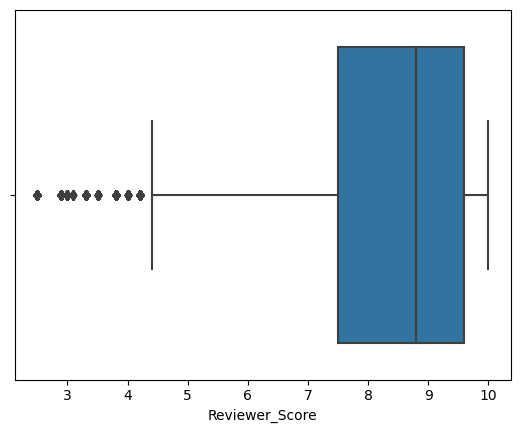

In [15]:
sns.boxplot(x=hotel_df['Reviewer_Score'])


#### modify the above graph. make the best visual presentation of it

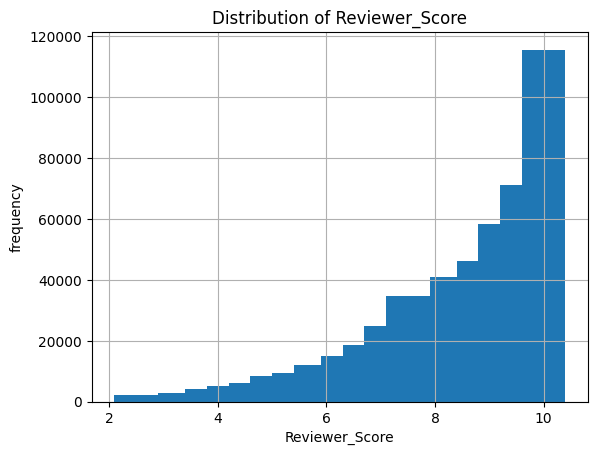

In [16]:
plt.figure()
plt.bar(hotel_df['Reviewer_Score'].value_counts().index,
        hotel_df['Reviewer_Score'].value_counts().values)
plt.xlabel('Reviewer_Score')
plt.title('Distribution of Reviewer_Score')
plt.ylabel('frequency')
plt.grid()
plt.show()

From above boxplot and histogram, left skewness can be seen, which means that our `Reviewer_Score` column is __not normally distributed.__

#### Checking the distribution using a kde plot and Q-Q plot

In [17]:
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

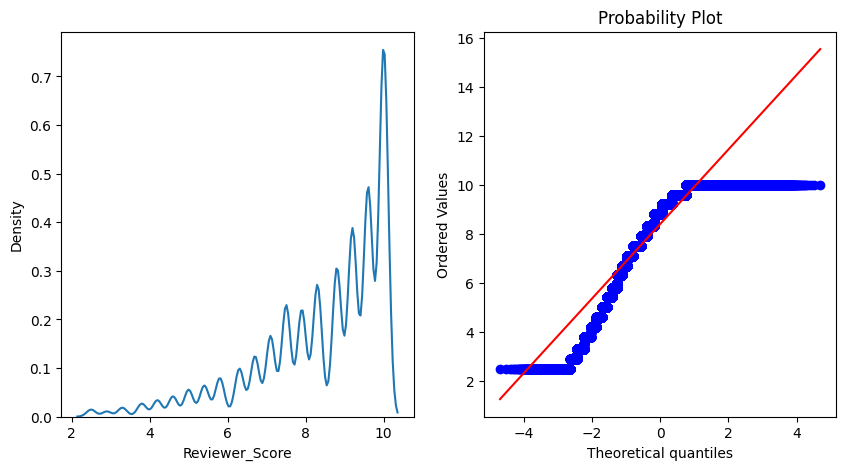

In [18]:
normality(hotel_df,'Reviewer_Score')

The X-axis of the right QQ  plot has Quantiles values and Y-axis has the `Reviewer_Score` values. From the plot, it can be analyzed that the data points of the `Reviewer_Score` feature are not falling on a straight line. This implies that it does not follow a normal distribution.

#### Some experiments to change the distribution to the normal distribution 

##### Log

In [19]:
#performing logarithmic transformation on the feature
hotel_df['Reviewer_Score_log']=np.log(hotel_df['Reviewer_Score'])

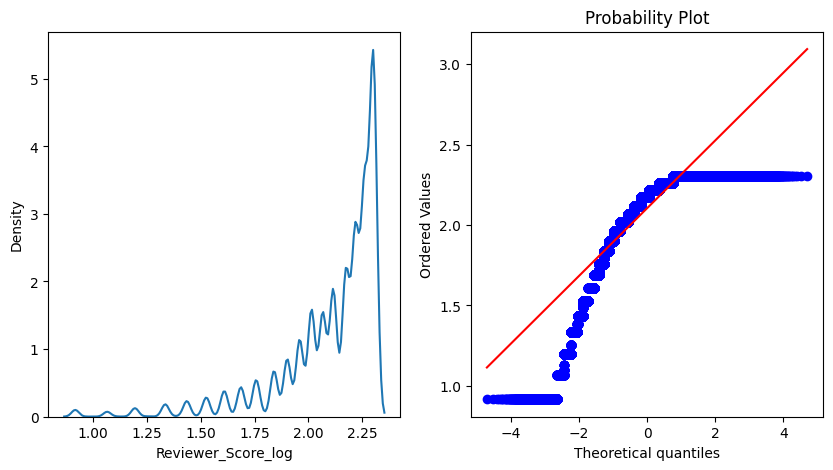

In [20]:
#plotting to check the transformation
normality(hotel_df,'Reviewer_Score_log')

Log is __not__ success.

##### Reciprocality

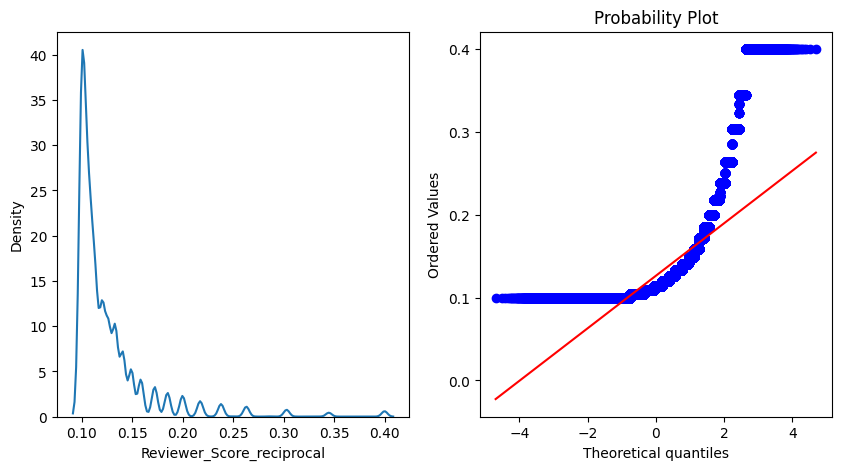

In [21]:
# taking reciprocal of the reviewer_score column
hotel_df['Reviewer_Score_reciprocal']=1/hotel_df.Reviewer_Score
normality(hotel_df,'Reviewer_Score_reciprocal')

As expected, does __not__ do anything.

##### sqrt

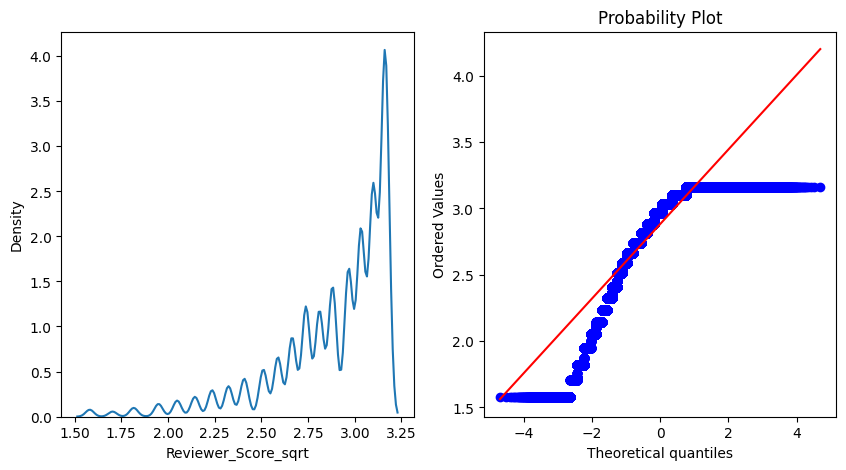

In [22]:
# taking sqrt of the reviewer_score column
hotel_df['Reviewer_Score_sqrt']=np.sqrt(hotel_df.Reviewer_Score)
normality(hotel_df,'Reviewer_Score_sqrt')

Above distribution is __similar to the log tranformation__ of the `Reviewer_Score` column.

##### Exponential

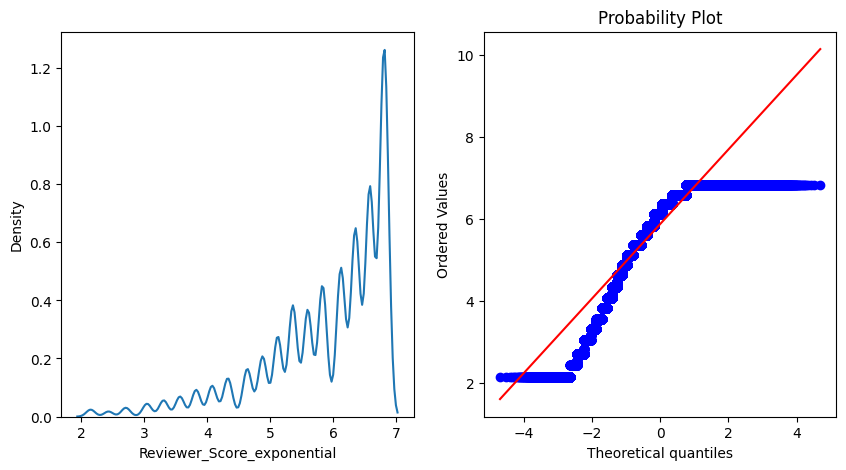

In [23]:
# taking squar of reviewer_score column
hotel_df['Reviewer_Score_exponential']=hotel_df.Reviewer_Score**(1/1.2)
normality(hotel_df,'Reviewer_Score_exponential')

In [24]:
# same distribution every time

##### Boxcox transformation 

This has a complex mathematical function to convert a variable, but the point here is just to convert the target variable to some different matrics.

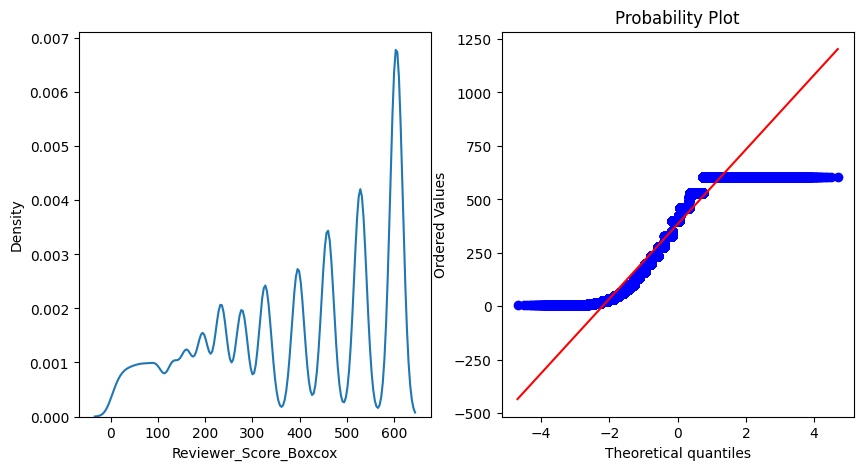

In [25]:
# converting reviewer_score according to boxcox
hotel_df['Reviewer_Score_Boxcox'],parameters=stats.boxcox(hotel_df['Reviewer_Score'])
normality(hotel_df,'Reviewer_Score_Boxcox')

This trandformation is far most the best compared to all the previous transformations as points are somewhat aligned to the red line in the middle. However, this transformation also does not meet the expectations.

After many tries, the distribution of the points is not becoming normal, still try to scale the axis in new ways to make it look it gaussian or normal distribution.


The above graph shows that the distribution of our target variable is highly skewed to the left. This means that most of the scores given by the people are given maximum and which can be assumed that they have a __happy behaviour or good satisfaction__ with the service provided to the customers.

It would be fun to know which are the hotels and their addresses which had the lowest customer satisfaction. Basically the Reviewer_score and addresses and hotel names would be very interesting note in this!!! __Check__

__Note:__ There can be many ways in which the distribution of the data could be made normal such as log transformation, square root transformation, reciprocal transformation, exponential transformation, box-cox transformation, etcetera.

---

### Ques 1.b
<a class ='anchor' id = 'Que1.b' ></a>

__Convert all the decimals present in the `Reviewer_Score` column to integers from 1 to 10.__

In [26]:
# rounding the reviewer score to the closest integer 
hotel_df.Reviewer_Score = hotel_df.Reviewer_Score.apply(np.round)

In [27]:
#sanity check
# having the counts of the categories in the duplicated dataset
hotel_df['Reviewer_Score'].value_counts()

10.0    187440
8.0     109915
9.0     105520
7.0     43994 
6.0     27730 
5.0     24116 
4.0     9406  
3.0     4380  
2.0     2185  
Name: Reviewer_Score, dtype: int64

__Note:__ (np.round) does not round int.5 to int+1, ranther it rounds int to int. For eg: 2.5 is rounded to 2, not 3.

Now, let's convert the column from float to int. I think the round functions automatically changes the type. Let's __Check__

In [28]:
# conversion of dtype
hotel_df['Reviewer_Score'] = hotel_df['Reviewer_Score'].astype(int)

In [29]:
#sanity check
hotel_df.dtypes #success

Hotel_Address                                 object 
Additional_Number_of_Scoring                  int64  
Review_Date                                   object 
Average_Score                                 float64
Hotel_Name                                    object 
Reviewer_Nationality                          object 
Negative_Review                               object 
Review_Total_Negative_Word_Counts             int64  
Total_Number_of_Reviews                       int64  
Positive_Review                               object 
Review_Total_Positive_Word_Counts             int64  
Total_Number_of_Reviews_Reviewer_Has_Given    int64  
Reviewer_Score                                int32  
Tags                                          object 
days_since_review                             object 
lat                                           float64
lng                                           float64
Reviewer_Score_log                            float64
Reviewer_Score_reciprocal   

---

#### check for missing data

In [30]:
# both the below functions return the same answer
hotel_df.isnull().sum()

Hotel_Address                                 0   
Additional_Number_of_Scoring                  0   
Review_Date                                   0   
Average_Score                                 0   
Hotel_Name                                    0   
Reviewer_Nationality                          0   
Negative_Review                               0   
Review_Total_Negative_Word_Counts             0   
Total_Number_of_Reviews                       0   
Positive_Review                               0   
Review_Total_Positive_Word_Counts             0   
Total_Number_of_Reviews_Reviewer_Has_Given    0   
Reviewer_Score                                0   
Tags                                          0   
days_since_review                             0   
lat                                           3268
lng                                           3268
Reviewer_Score_log                            0   
Reviewer_Score_reciprocal                     0   
Reviewer_Score_sqrt            

There are 3268 null values in the `Lat` and `Lon` columns. They have to dealt properly. There are number of ways to fill these, so let's see which works out the best for us.


In [31]:
#calculating % of null data
hotel_df.isnull().sum()*100/hotel_df.shape[0]

Hotel_Address                                 0.00000
Additional_Number_of_Scoring                  0.00000
Review_Date                                   0.00000
Average_Score                                 0.00000
Hotel_Name                                    0.00000
Reviewer_Nationality                          0.00000
Negative_Review                               0.00000
Review_Total_Negative_Word_Counts             0.00000
Total_Number_of_Reviews                       0.00000
Positive_Review                               0.00000
Review_Total_Positive_Word_Counts             0.00000
Total_Number_of_Reviews_Reviewer_Has_Given    0.00000
Reviewer_Score                                0.00000
Tags                                          0.00000
days_since_review                             0.00000
lat                                           0.63495
lng                                           0.63495
Reviewer_Score_log                            0.00000
Reviewer_Score_reciprocal   

Approximately 6.3% of the dataset has null values. Let's deal with them appropriately.

Now let's check that it is the same row that `lat` and `lng` is missing. This is being checked because there can be cases in which a row can have a lat value but missing lon value and vice versa. So let's check these.

In [32]:
# check the shape for missing lat OR lon values
hotel_df[(hotel_df['lat'].isnull()) | (hotel_df['lng'].isnull())].shape

(3268, 22)

In [33]:
# check the shape for missing lat AND lng values
hotel_df[(hotel_df['lat'].isnull()) & (hotel_df['lng'].isnull())].shape

(3268, 22)

From above it can be infered out that `lat` and `lng` are missing for the same row and while filling the values for this, just fill the coordinates of that `Hotel_Address` inside it.


Let's see the dataset for only the null values of `lat` and `lng`

In [34]:
# defining the dataset
empty_df = hotel_df[(hotel_df['lat'].isnull()) & (hotel_df['lng'].isnull())]

In [35]:
# peeking into the dataset
empty_df.loc[:, ['Hotel_Address', 'lng', 'lat']].sample(2)

,Hotel_Address,lng,lat
351824,Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria,NaN,NaN
116776,23 Rue Damr mont 18th arr 75018 Paris France,NaN,NaN


Now let's check the unique number of hotel address which have null values in the dataset.

In [36]:
# number of unique address
len(pd.unique(empty_df['Hotel_Address']))

17

So basically there are only 17 unique number of hotel addresses. And since this number is small it is possible to fill these values manully using google maps.

In [37]:
# checking value counts
empty_df['Hotel_Address'].value_counts()

Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    658
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            563
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       389
4 rue de la P pini re 8th arr 75008 Paris France               290
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         245
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          223
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               194
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria            147
Bail n 4 6 Eixample 08010 Barcelona Spain                      146
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria            93 
Hasenauerstra e 12 19 D bling 1190 Vienna Austria              61 
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria       57 
23 Rue Damr mont 18th arr 75018 Paris France                   55 
Paragonstra e 1 11 Simmering 1110 Vienna Austria               49 
20 Rue De La Ga t 14th arr 75014 Paris France                 

Now let's fill the empty entries in hotel_df manully by searching on the google maps.

In [38]:
# fill the Hotel_Address with the missing lat
Josefst_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria')
hotel_df[Josefst_lat]
hotel_df.loc[Josefst_lat, 'lat'] = 48.209541

# fill the Hotel_Address with the missing lng
Josefst_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria')
hotel_df[Josefst_lng]
hotel_df.loc[Josefst_lng, 'lng'] = 16.353403

In [39]:
# fill the Hotel Address with the missing lat
Taborstra_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria')
hotel_df[Taborstra_lat]
hotel_df.loc[Taborstra_lat, 'lat'] = 48.213787

# fill the Hotel Address with the missing lng
Taborstra_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria')
hotel_df[Taborstra_lng]
hotel_df.loc[Taborstra_lng, 'lng'] = 16.379859

In [40]:
# fill the Hotel Address with the missing lat 
hringer_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria')
hotel_df[hringer_lat]
hotel_df.loc[hringer_lat, 'lat'] = 48.220553

# fill the Hotel Address with the missing lng 
hringer_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria')
hotel_df[hringer_lng]
hotel_df.loc[hringer_lng, 'lng'] = 16.355872

In [41]:
# fill the Hotel Address with the missing lat 
rue_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== '4 rue de la P pini re 8th arr 75008 Paris France')
hotel_df[rue_lat]
hotel_df.loc[rue_lat, 'lat'] = 48.875437

# fill the Hotel Address with the missing lng 
rue_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== '4 rue de la P pini re 8th arr 75008 Paris France')
hotel_df[rue_lng]
hotel_df.loc[rue_lng, 'lng'] = 2.323386

In [42]:
# fill the Hotel Address with the missing lat 
Landstra_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria')
hotel_df[Landstra_lat]
hotel_df.loc[Landstra_lat, 'lat'] = 48.188930

# fill the Hotel Address with the missing lng 
Landstra_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria')
hotel_df[Landstra_lng]
hotel_df.loc[Landstra_lng, 'lng'] = 16.383754

In [43]:
# fill the Hotel Address with the missing lat 
hringer2_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria')
hotel_df[hringer2_lat]
hotel_df.loc[hringer2_lat, 'lat'] = 48.216978

# fill the Hotel Address with the missing lng 
hringer2_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria')
hotel_df[hringer2_lng]
hotel_df.loc[hringer2_lng, 'lng'] = 16.359916

In [44]:
# fill the Hotel Address with the missing lat 
Savoyenstra_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria')
hotel_df[Savoyenstra_lat]
hotel_df.loc[Savoyenstra_lat, 'lat'] = 48.219740

# fill the Hotel Address with the missing lng 
Savoyenstra_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria')
hotel_df[Savoyenstra_lng]
hotel_df.loc[Savoyenstra_lng, 'lng'] = 16.285602

In [45]:
# fill the Hotel Address with the missing lat 
Sieveringer_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria')
hotel_df[Sieveringer_lat]
hotel_df.loc[Sieveringer_lat, 'lat'] = 48.246198

# fill the Hotel Address with the missing lng 
Sieveringer_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria')
hotel_df[Sieveringer_lng]
hotel_df.loc[Sieveringer_lng, 'lng'] = 16.341547

In [46]:
# fill the Hotel Address with the missing lat 
Bail_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Bail n 4 6 Eixample 08010 Barcelona Spain')
hotel_df[Bail_lat]
hotel_df.loc[Bail_lat, 'lat'] = 41.391725

# fill the Hotel Address with the missing lng 
Bail_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Bail n 4 6 Eixample 08010 Barcelona Spain')
hotel_df[Bail_lng]
hotel_df.loc[Bail_lng, 'lng'] = 2.177915

In [47]:
# fill the Hotel Address with the missing lat 
Grnent_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria')
hotel_df[Grnent_lat]
hotel_df.loc[Grnent_lat, 'lat'] = 48.221044

# fill the Hotel Address with the missing lng 
Grnent_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria')
hotel_df[Grnent_lng]
hotel_df.loc[Grnent_lng, 'lng'] = 16.366627

In [48]:
# fill the Hotel Address with the missing lat 
Hasenauerstra_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Hasenauerstra e 12 19 D bling 1190 Vienna Austria')
hotel_df[Hasenauerstra_lat]
hotel_df.loc[Hasenauerstra_lat, 'lat'] = 48.234436

# fill the Hotel Address with the missing long 
Hasenauerstra_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Hasenauerstra e 12 19 D bling 1190 Vienna Austria')
hotel_df[Hasenauerstra_lng]
hotel_df.loc[Hasenauerstra_lng, 'lng'] = 16.345689

In [49]:
# fill the Hotel Address with the missing lat 
Josefst2_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria')
hotel_df[Josefst2_lat]
hotel_df.loc[Josefst2_lat, 'lat'] = 48.209727

# fill the Hotel Address with the missing long 
Josefst2_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria')
hotel_df[Josefst2_lng]
hotel_df.loc[Josefst2_lng, 'lng'] = 16.351463

In [50]:
# fill the Hotel Address with the missing lat 
Rue_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== '23 Rue Damr mont 18th arr 75018 Paris France')
hotel_df[Rue_lat]
hotel_df.loc[Rue_lat, 'lat'] = 48.889082

# fill the Hotel Address with the missing lng 
Rue_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== '23 Rue Damr mont 18th arr 75018 Paris France')
hotel_df[Rue_lng]
hotel_df.loc[Rue_lng, 'lng'] = 2.333104

In [51]:
# fill the Hotel Address with the missing lat 
Paragonstra_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Paragonstra e 1 11 Simmering 1110 Vienna Austria')
hotel_df[Paragonstra_lat]
hotel_df.loc[Paragonstra_lat, 'lat'] = 48.188249

# fill the Hotel Address with the missing lng 
Paragonstra_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Paragonstra e 1 11 Simmering 1110 Vienna Austria')
hotel_df[Paragonstra_lng]
hotel_df.loc[Paragonstra_lng, 'lng'] = 16.420534

In [52]:
# fill the Hotel Address with the missing lat 
dela_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== '20 Rue De La Ga t 14th arr 75014 Paris France')
hotel_df[dela_lat]
hotel_df.loc[dela_lat, 'lat'] = 48.840151

# fill the Hotel Address with the missing lng 
dela_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== '20 Rue De La Ga t 14th arr 75014 Paris France')
hotel_df[dela_lng]
hotel_df.loc[dela_lng, 'lng'] = 2.323577

In [53]:
# fill the Hotel Address with the missing lat 
pau_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Pau Clar s 122 Eixample 08009 Barcelona Spain')
hotel_df[pau_lat]
hotel_df.loc[pau_lat, 'lat'] = 41.394146

# fill the Hotel Address with the missing lng 
pau_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Pau Clar s 122 Eixample 08009 Barcelona Spain')
hotel_df[pau_lng]
hotel_df.loc[pau_lng, 'lng'] = 2.167652

In [54]:
# fill the Hotel Address with the missing lat 
Sep_lat = (hotel_df['lat'].isna()) & (hotel_df['Hotel_Address']== 'Sep lveda 180 Eixample 08011 Barcelona Spain')
hotel_df[Sep_lat]
hotel_df.loc[Sep_lat, 'lat'] = 41.383423

# fill the Hotel Address with the missing lng 
Sep_lng = (hotel_df['lng'].isna()) & (hotel_df['Hotel_Address']== 'Sep lveda 180 Eixample 08011 Barcelona Spain')
hotel_df[Sep_lng]
hotel_df.loc[Sep_lng, 'lng'] = 2.162944

So here `lat` and `lng` are successfully filled manually against NULL values.

In [55]:
# sanity check
hotel_df[(hotel_df['lat'].isnull()) & (hotel_df['lng'].isnull())]

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Reviewer_Score,Tags,days_since_review,lat,lng,Reviewer_Score_log,Reviewer_Score_reciprocal,Reviewer_Score_sqrt,Reviewer_Score_exponential,Reviewer_Score_Boxcox


In [56]:
# sanity check
hotel_df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
Reviewer_Score_log                            0
Reviewer_Score_reciprocal                     0
Reviewer_Score_sqrt                           0
Reviewer_Score_exponential              

Sometimes there are empty strings in the data provided which the isna() and isnull() function completely misses. So let's check for them.

In [57]:
# checking for the empty string in news dataset
hotel_df.eq('').sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
Reviewer_Score_log                            0
Reviewer_Score_reciprocal                     0
Reviewer_Score_sqrt                           0
Reviewer_Score_exponential              

There are no empty strings in the dataset, columns which are in text/string format.

----

### Ques 1.c Distribution of the hotel dataset
<a class ='anchor' id = 'Que1.c' ></a>

In [58]:
# having the counts of the categories in the hotel dataset
hotel_df['Reviewer_Score'].value_counts()

10    187440
8     109915
9     105520
7     43994 
6     27730 
5     24116 
4     9406  
3     4380  
2     2185  
Name: Reviewer_Score, dtype: int64

__Question is what is the distribution of the scores prior to riunding off vs after rounding off the integers__

Ther are many ways in which the distribution of the variable can be seen or not. It really depends upon the type of the variable anyone is choosing. For instance, in this example `Reviewer_Score` is being converted into categories of integers from 1 to 10 and to check the distribution of this column, bar graph is the best option to see the distribution.

__Note:__ In cases where the variable is continuous, KDE plots, histograms, Q-Q plots can be used to see the distribution of the variable. This can be seen when `Reviewer_Score` was still a continuous variable.

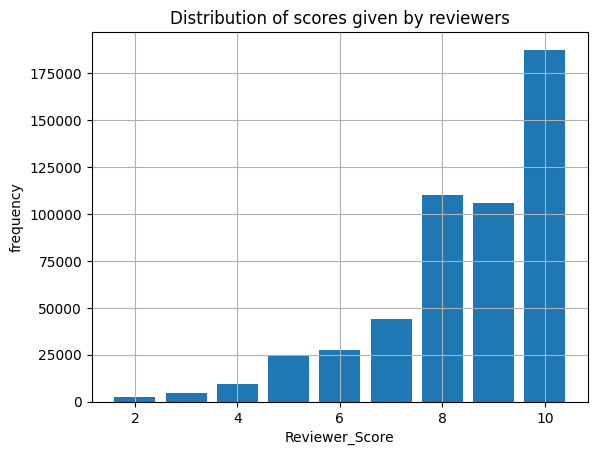

In [59]:
# plotting distribution
plt.figure()
plt.bar(hotel_df['Reviewer_Score'].value_counts().index,
        hotel_df['Reviewer_Score'].value_counts().values)
plt.xlabel('Reviewer_Score')
plt.ylabel('frequency')
plt.title('Distribution of scores given by reviewers')
plt.grid()
plt.show()

From the above we can see that full score has been provided by reviewers from over __180,000.__

In [60]:
#skewness in the Reviewer_Score column
hotel_df['Reviewer_Score'].skew()

-1.217946356922068

As the skewness is below -1, this means that our distribution is highly skewed to the left or negatively skewed.

Text(0.5, 1.0, 'Pie chart showing the distribution of the `Reviewer_Score` column')

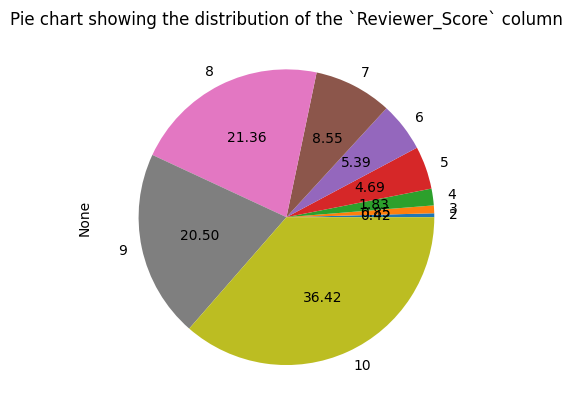

In [61]:
# making pie chart for the distribution of our categories in the Reviewer_Score column
hotel_df.groupby('Reviewer_Score').size().plot(kind='pie', autopct='%.2f')
plt.title('Pie chart showing the distribution of the `Reviewer_Score` column')

The numbers inside the pies above show the percentile proportion of the corresponding category in `Reviewer_Score` column. The numbers outside are the categories.

### check for the distribution of the column, basically the outliers present in the data. But how to check the outliers??

#### Interpretations from the above distributions:

1. When the `Reviewer_Score` was a continous variable across the dataset, it was highly skewed to the left and after it has been converting into integers, it was expected to show the same distribution.
2. This is because all the decimals are converted to the nearest integer, basically does not change the values of decimals by a huge difference. Therefore similar kind of distribution and skewness is seen even after the conversion.

----

### 1.d Given this will be a classification problem, what is a potential problem with this distribution?
<a class ='anchor' id = 'Que1.d' ></a>

From the above distribution of the scores given by the customers it can be seen that the data is skewed to the left which would put a really bad impact on the analyis and modelling of our data. We really need to adjust the data points or make clusters in such a manner that the distribution of this column could be normal and we can start our analysis and our modelling.

Effects of skewed data: Degrades the model’s ability (especially regression based models) to describe typical cases as it has to deal with rare cases on extreme values. ie right skewed data will predict better on data points with lower value as compared to those with higher values. Skewed data also does not work well with many statistical methods. However, tree based models are not affected.




---

---

### Question 2: This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?
<a class ='anchor' id = 'part2' ></a>

In [62]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514686 entries, 0 to 515737
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               514686 non-null  object 
 1   Additional_Number_of_Scoring                514686 non-null  int64  
 2   Review_Date                                 514686 non-null  object 
 3   Average_Score                               514686 non-null  float64
 4   Hotel_Name                                  514686 non-null  object 
 5   Reviewer_Nationality                        514686 non-null  object 
 6   Negative_Review                             514686 non-null  object 
 7   Review_Total_Negative_Word_Counts           514686 non-null  int64  
 8   Total_Number_of_Reviews                     514686 non-null  int64  
 9   Positive_Review                             514686 non-null  object 
 

In [63]:
## dropping the already created columns
hotel_df.drop(['Reviewer_Score_log', 'Reviewer_Score_reciprocal', 'Reviewer_Score_sqrt', 'Reviewer_Score_exponential', 'Reviewer_Score_Boxcox'], axis=1, inplace=True)

In [64]:
# sanity check
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514686 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               514686 non-null  object 
 1   Additional_Number_of_Scoring                514686 non-null  int64  
 2   Review_Date                                 514686 non-null  object 
 3   Average_Score                               514686 non-null  float64
 4   Hotel_Name                                  514686 non-null  object 
 5   Reviewer_Nationality                        514686 non-null  object 
 6   Negative_Review                             514686 non-null  object 
 7   Review_Total_Negative_Word_Counts           514686 non-null  int64  
 8   Total_Number_of_Reviews                     514686 non-null  int64  
 9   Positive_Review                             514686 non-null  object 
 

In [65]:
# list of numeric columns
list(hotel_df.select_dtypes(['int64', 'float64']).columns)

['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'lat',
 'lng']

In [66]:
# list of object columns
list(hotel_df.select_dtypes(['object']).columns)

['Hotel_Address',
 'Review_Date',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Positive_Review',
 'Tags',
 'days_since_review']

Let's go throgh some of the columns one by one and make a rough guess that can they be converted to numeric or not.

In [67]:
# number of unique hote address
len(pd.unique(hotel_df['Hotel_Address']))

1489

In [68]:
hotel_df['Hotel_Address'].sample(5)

246287    8 10 Queensberry Place Kensington and Chelsea London SW7 2EA United Kingdom
186749    41 Rue Des Ecoles 5th arr 75005 Paris France                               
55711     15 Rue Jacob 6th arr 75006 Paris France                                    
438590    Rusland 17 Amsterdam City Center 1012 CK Amsterdam Netherlands             
89148     2 place Louis Armand 12th arr 75012 Paris France                           
Name: Hotel_Address, dtype: object

Hotel_Address has unique 1489 number of addresses. 

In [69]:
# number of unique hotel name
len(pd.unique(hotel_df['Hotel_Name']))

1488

In [70]:
hotel_df['Hotel_Name'].sample(5)

203780    La Maison Favart             
44786     The Chamberlain              
10165     Grand Royale London Hyde Park
60495     Clayton Crown Hotel London   
135232    Novotel London Paddington    
Name: Hotel_Name, dtype: object

There are 1488 unique hotels in the dataset.

In [71]:
# number of unique reviewer_nationality
len(pd.unique(hotel_df['Reviewer_Nationality']))

227

In [72]:
# looking for frequency
hotel_df['Reviewer_Nationality'].value_counts()

 United Kingdom               244974
 United States of America     35261 
 Australia                    21610 
 Ireland                      14801 
 United Arab Emirates         10223 
                              ...   
 Cape Verde                   1     
 Northern Mariana Islands     1     
 Tuvalu                       1     
 Guinea                       1     
 Palau                        1     
Name: Reviewer_Nationality, Length: 227, dtype: int64

`Reviewer_Nationality` looks very skewed.

In [73]:
# unique number of tags
len(pd.unique(hotel_df['Tags']))

55228

In [74]:
hotel_df['Tags'].sample(5)

79146     [' Leisure trip ', ' Couple ', ' Classic Twin Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                   
465423    [' Leisure trip ', ' Group ', ' Standard Twin Room ', ' Stayed 5 nights ']                                                      
222942    [' Leisure trip ', ' Family with young children ', ' Deluxe Double plus Single Bed ', ' Stayed 1 night ']                       
266832    [' Leisure trip ', ' Group ', ' Queen Hilton Guest Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']              
225738    [' Leisure trip ', ' Travelers with friends ', ' Comfort Double Room ', ' Stayed 5 nights ', ' Submitted from a mobile device ']
Name: Tags, dtype: object

In [75]:
hotel_df['Tags'].value_counts()

[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                              5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                     4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                     4358
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                       3981
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                                             3291
                                                                                                                                                     ... 
[' Business trip ', ' Group ', ' Classic Double or Single Room ', ' Stayed 2

__There are 6 columns in the hotel dataset which are non-numeric and some of the them could be converted to the numeric by different methods for each.__

1. `Hotel_Address` and `lat` & `lng` represent the same information and thus `Hotel_Address` can be deleted from the dataset. Though it has 1489 unique or distinct values in the dataset but it would be hard to create them into numbers. Also, there can be many variations of a single address but their location would be same. __However, it can be noticed that address contains city and country of the hotel, so before deleting this column city and country can be extracted out to do some EDA and eventually modelling with other features and traget variable.__


2. Since reviews of the hotels are being analysed and there has to be information of the hotel in which the reviewer stayed. There is just 1 column which is directly related to the hotel, i.e. `Hotel_Name`, and if this coulmn is deleted then analysis and modelling would be very vague. So this is one of the inportant columns to keep. Also the information depicts it cannot be feature engineered with any of the other columns. So better keep `Hotel_Name` column and convert it to numbers using OHE. __There are 1488 unique number of hotels, what other thing could be done is using K-means clustering some of the hotels can be grouped together on the basis of `lat` and `lng`. However, by this logic, for sure, important information would be losed.__ 



3. `Reviewer_Nationality` is also one of the important coulmns because there is no coulmn which represents some kind of identity of the reviewer. Deleting is not one of the options for this column. Although there are 227 nationalities present in the dataset. But it is very skewed, so it needs to be converted some kind of clusters like nationalities according to the continents, which are 7, or they can be clustered like north-east Asia, South-west asia, Scandinavian countires, etcetera. Basically clusters can be made out of these 227 countries and trying to making distribution as equal as possible. Eventually then these clusters or categories can be then converted to the numeric columns. __But it would be very hard as there are as many nationalities as many countries are there, which means a way should be found to cluster according to continents OR simply apply OHE on all of them.__


4. `Negative_Review` and `Positive_Review` are basically the text columns representing the reviews of the customers and these can be definately be converted to numeric columns by following the pre-processing NLP steps, that are, tokenisation, stop-word removal, stemming and lemmatization. Also, it would be interesting to note the correlation between the `Positive_Review` and `Reviewer_Score` which can be assumed that they could have a high correlation, but for sure this needs to be checked.


5. `Tags` column basically represents different characteristics of the stay of the customers in that particular row of the dataset. There are strings inside the list of this column. There are different length of these strings in this column, which means number of characteristics of the stay or visit by the customer is not same. This column is conveying a lot of information in terms of the stay of reviewer. Definately this column can be converted to the numeric column by extracrting out all these strings and then perform one-hot encoding to convert it to a numeric column.  


6. `days_since_review` is easy to decide as words "day" and "days" can be cut out from the column and then eventually convert the column to int type.

---

----

## Question 3: Data Wrangling
<a class ='anchor' id = 'Que3' ></a>

In [76]:
# shape of our dataset
hotel_df.shape

(514686, 17)

As there are a lot of rows in this dataset, computers need a really high computational power to to execute operations while doing EDA and modelling. So, it's a good practice to take a subset out of the main dataset and then perform EDA and modelling.

__Note:__ It should be noted that subset should be very carefully taken out of the dataset. Subset of the dataset should be such that it has proportions of classes and categories is same amount as the original dataset.


__Note:__ Taking a subset from the original dataset is different from the splitting the dataset in test-train splits. Proportions have to be same in both of these kind of splits.


Let's take 10% subset from the original hotel dataset of the dataset.


In [77]:
# takeing 10% sample from the dataset
hotel2_df = hotel_df.sample(frac=0.1, random_state=1)

In [78]:
# checking shape 
hotel2_df.shape

(51469, 17)

So the new dataset has 51469 rows and 17 columns.

In [79]:
hotel_df.sample(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
326222,George Gershwinlaan 101 Zuideramstel 1082 MT Amsterdam Netherlands,203,6/14/2017,9.0,Crowne Plaza Amsterdam South,United Kingdom,Breakfast was expensive at 19 euros per guest,10,1349,Friendly and helpful staff Nice accommodation If you re planning to visit the centre the metro is only a 10 minute walk,24,3,9,"[' Leisure trip ', ' Couple ', ' Superior Twin Room ', ' Stayed 2 nights ']",50 days,52.335733,4.874395


### 3.a Conversion of `Reviewer_Score` column to 1s and 0s
<a class ='anchor' id = 'Que3.a' ></a>

In [80]:
# checking the value counts of this column
hotel2_df['Reviewer_Score'].value_counts()

10    18584
8     10997
9     10626
7     4416 
6     2733 
5     2456 
4     968  
3     477  
2     212  
Name: Reviewer_Score, dtype: int64

As it was observed that the distribution of the `Reviewer_Score` column was very skewed and it is the dependent variable, so it was necesarry to make its distribution normal. There were many efforts being put like changing the scale in the distribution axes, but none was successful. 


The last remaining option is to make clusters and possibly assign 2(binary) integers to have almost same distribution.

In [81]:
# converting to binary 1 and 0
hotel2_df['Reviewer_Score'] = np.where(hotel2_df['Reviewer_Score'] < 9, 0, 1)

In [82]:
# checking the value counts of this column
hotel2_df['Reviewer_Score'].value_counts()

1    29210
0    22259
Name: Reviewer_Score, dtype: int64

Let's graph the above counts and see the distribution.

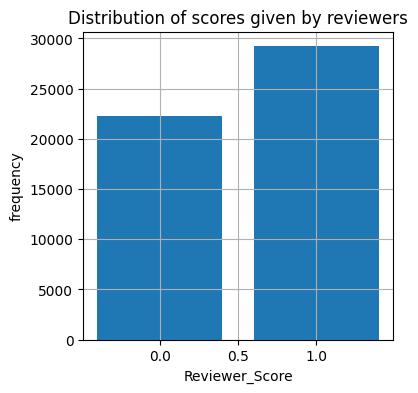

In [83]:
# plotting distribution
plt.figure(figsize=(4,4))
plt.bar(hotel2_df['Reviewer_Score'].value_counts().index,
        hotel2_df['Reviewer_Score'].value_counts().values)
plt.xlabel('Reviewer_Score')
plt.ylabel('frequency')
plt.title('Distribution of scores given by reviewers')
plt.grid()
plt.show()

From above it can be seen that the bars are relatively not that much different as before. Now it would be good while doing EDA and modelling. 

---

### 3.b Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except `Positive_Review` and `Negative_Review.`
<a class ='anchor' id = 'Que3.b' ></a>

Let's first peek into the dataset and then change the possible categorical columns to the numeric columns. __let's see__

In [84]:
# taking sample from the dataset
hotel2_df.sample(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
456388,Spaarndammerdijk 304 Westerpark 1013 ZX Amsterdam Netherlands,252,1/22/2016,8.5,WestCord Art Hotel Amsterdam 4 stars,Italy,Location Little bit far from city centre 20 mins from Amsterdam Station,14,1712,1 Good breakfast 2 Cleaner and Bigger Room 3 Worth for value,13,2,0,"[' Leisure trip ', ' Family with young children ', ' Large Room ', ' Stayed 1 night ']",559 day,52.392490,4.868382
25859,100 Shoreditch High Street Hackney London E1 6JQ United Kingdom,404,6/17/2017,8.6,Ace Hotel London Shoreditch,United States of America,No Negative,0,1593,Friendly staff and great vibe,7,6,1,"[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ']",47 days,51.525416,-0.077285


#### 3.b.1 days_since_review
<a class ='anchor' id = 'Que3.b.1' ></a>

In [85]:
# changing days since review to numeric type
hotel2_df['days_since_review']

290523    534 day
315216    186 day
421407    22 days
15931     10 days
294301    562 day
           ...   
248711    101 day
14669     668 day
43988     338 day
274396    547 day
364843    279 day
Name: days_since_review, Length: 51469, dtype: object

There are day and days both present in the dataset. Ideally day and days are to be cut out and convert the rest of the column to the int type. 

In [86]:
# Apply split using an accessor
# new data frame with split value columns
new = hotel2_df["days_since_review"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
hotel2_df["#days_since_review"]= new[0]
 
# making separate last name column from new data frame
hotel2_df["days"]= new[1]
 
# Dropping old Name columns
hotel2_df.drop(columns =["days_since_review"], inplace = True)
 
# df display
hotel2_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,lat,lng,#days_since_review,days
290523,Bryanston Street Marble Arch Westminster Borough London W1H 7EH United Kingdom,908,2/16/2016,8.5,Amba Hotel Marble Arch,United Kingdom,Nothing it was great,5,3980,The room was fantastic could not have asked for more Bed was so comfy Breakfast was amazing the hotel smelt lovely staff very friendly Excellent location Loved it would definitely recommend,33,2,1,"[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ']",51.514400,-0.156551,534,day
315216,Donau City Stra e 7 22 Donaustadt 1220 Vienna Austria,321,1/29/2017,8.6,Melia Vienna,Austria,The surrounding,3,3557,A very modern hotel clean and comfortable rooms excellent restaurant on top of the hotel very friendly staff,19,3,1,"[' Business trip ', ' Solo traveler ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']",48.231911,16.412949,186,day
421407,Prinsengracht 587 Amsterdam City Center 1067 HT Amsterdam Netherlands,145,7/12/2017,9.3,Andaz Amsterdam Prinsengracht A Hyatt Hotel,Qatar,Maybe the sink but I get use to it,11,851,Everything s was perfect,5,9,1,"[' Leisure trip ', ' Family with young children ', ' 2 rooms ', ' Stayed 4 nights ', ' Submitted from a mobile device ']",52.367837,4.883079,22,days
15931,1 Waterview Drive Greenwich London SE10 0TW United Kingdom,1258,7/24/2017,9.4,Intercontinental London The O2,France,The breakfast not included in the price,9,4204,The view from the bedroom the restaurant was fantastic,11,2,1,"[' Couple ', ' Deluxe Double or Twin Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']",51.502435,-0.000250,10,days
294301,Capellans 4 Ciutat Vella 08002 Barcelona Spain,387,1/19/2016,8.9,Hotel Barcelona Catedral,United Kingdom,could of done with a bit more storage as drawers,11,2695,the bed was great as with the rest of the room,12,11,0,"[' Leisure trip ', ' Group ', ' Double or Twin Room 1 2 Adults ', ' Stayed 3 nights ']",41.384829,2.175128,562,day


In [87]:
# peeking into that extra column we created
hotel2_df['days'].value_counts()

day     43959
days    7510 
Name: days, dtype: int64

Delete it anyways, this column is not needed.

In [88]:
# dropping the days column
hotel2_df.drop(columns =["days"], inplace = True)

Convert to int type.

In [89]:
# changing the dtype of this column from object to numeric
hotel2_df["#days_since_review"] = pd.to_numeric(hotel2_df["#days_since_review"])

In [90]:
hotel2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51469 entries, 290523 to 364843
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               51469 non-null  object 
 1   Additional_Number_of_Scoring                51469 non-null  int64  
 2   Review_Date                                 51469 non-null  object 
 3   Average_Score                               51469 non-null  float64
 4   Hotel_Name                                  51469 non-null  object 
 5   Reviewer_Nationality                        51469 non-null  object 
 6   Negative_Review                             51469 non-null  object 
 7   Review_Total_Negative_Word_Counts           51469 non-null  int64  
 8   Total_Number_of_Reviews                     51469 non-null  int64  
 9   Positive_Review                             51469 non-null  object 
 10  Revi

From above it can be seen that some of the names of the hotels have city names attached to them. It would be fun to note what if the address includes the city of that corressponding hotel name or not.


#### 3.b.2 Review_Date
<a class ='anchor' id = 'Que3.b.2' ></a>

`Review_Date` column is not entered in datetime format. Let's first convert that and then proceed further.

In [91]:
# conversion
hotel2_df["Review_Date"]= pd.to_datetime(hotel2_df["Review_Date"])

Now to convert this column to numbers, let's split it into 3 parts, i.e., year, month and day.

In [92]:
# making 3 columns from 1 column
hotel2_df['Review_day'] = hotel2_df['Review_Date'].dt.day
hotel2_df['Review_month'] = hotel2_df['Review_Date'].dt.month
hotel2_df['Review_year'] = hotel2_df['Review_Date'].dt.year

In [93]:
# sanity check
hotel2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51469 entries, 290523 to 364843
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Hotel_Address                               51469 non-null  object        
 1   Additional_Number_of_Scoring                51469 non-null  int64         
 2   Review_Date                                 51469 non-null  datetime64[ns]
 3   Average_Score                               51469 non-null  float64       
 4   Hotel_Name                                  51469 non-null  object        
 5   Reviewer_Nationality                        51469 non-null  object        
 6   Negative_Review                             51469 non-null  object        
 7   Review_Total_Negative_Word_Counts           51469 non-null  int64         
 8   Total_Number_of_Reviews                     51469 non-null  int64         
 9   

Let's drop the `Review_Date` column, as it is not needed.

In [94]:
# dropping review_date column
hotel2_df.drop(columns=['Review_Date'], inplace = True)

In [95]:
#sanity check
hotel2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51469 entries, 290523 to 364843
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               51469 non-null  object 
 1   Additional_Number_of_Scoring                51469 non-null  int64  
 2   Average_Score                               51469 non-null  float64
 3   Hotel_Name                                  51469 non-null  object 
 4   Reviewer_Nationality                        51469 non-null  object 
 5   Negative_Review                             51469 non-null  object 
 6   Review_Total_Negative_Word_Counts           51469 non-null  int64  
 7   Total_Number_of_Reviews                     51469 non-null  int64  
 8   Positive_Review                             51469 non-null  object 
 9   Review_Total_Positive_Word_Counts           51469 non-null  int64  
 10  Tota

#### 3.b.3 Tags
<a class ='anchor' id = 'Que3.b.3' ></a>

Let us see what is in the tag column of the dataset.

In [96]:
# peeking into Tags column
hotel2_df['Tags']

290523    [' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ']                                            
315216    [' Business trip ', ' Solo traveler ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']  
421407    [' Leisure trip ', ' Family with young children ', ' 2 rooms ', ' Stayed 4 nights ', ' Submitted from a mobile device ']
15931     [' Couple ', ' Deluxe Double or Twin Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                    
294301    [' Leisure trip ', ' Group ', ' Double or Twin Room 1 2 Adults ', ' Stayed 3 nights ']                                  
                                                   ...                                                                            
248711    [' Solo traveler ', ' Standard Queen Room ', ' Stayed 1 night ']                                                        
14669     [' Leisure trip ', ' Couple ', ' Superior Room ', ' Stayed 1 night ', ' S

From above it can be assumed that `Tags` are present in a string. String itself contains a list of strings as elements of list. To convert `Tags` column into a numeric one, basic brief analogy would be count the unique number of strings present in all the lists present in the dataset. Then make that unique number og columns with the help of one-hot encoding.

Let convert all the strings present in all the lists to avoid any errors with the unique number of elements.

In [97]:
# converting strings in list to lower case
hotel2_df['Tags'] = hotel2_df['Tags'].astype(str).str.lower()

The next step from here would be to open string and then combine all lists to make one master list, so that unique values could be counted in the dataset.

In [98]:
from collections import Counter

In [99]:
Counter(hotel2_df['Tags'].explode())

Counter({"[' leisure trip ', ' couple ', ' standard double room ', ' stayed 1 night ']": 275,
         "[' business trip ', ' solo traveler ', ' deluxe double room ', ' stayed 1 night ', ' submitted from a mobile device ']": 82,
         "[' leisure trip ', ' family with young children ', ' 2 rooms ', ' stayed 4 nights ', ' submitted from a mobile device ']": 27,
         "[' couple ', ' deluxe double or twin room ', ' stayed 1 night ', ' submitted from a mobile device ']": 2,
         "[' leisure trip ', ' group ', ' double or twin room 1 2 adults ', ' stayed 3 nights ']": 4,
         "[' leisure trip ', ' couple ', ' double room ', ' stayed 2 nights ', ' submitted from a mobile device ']": 321,
         "[' leisure trip ', ' couple ', ' deluxe king room ', ' stayed 2 nights ']": 27,
         "[' leisure trip ', ' couple ', ' deluxe double room ', ' stayed 1 night ', ' submitted from a mobile device ']": 373,
         "[' leisure trip ', ' couple ', ' club double room ', ' stayed 1 ni

From above, it can be resulted out that explode function did not do as it was expected, instead it counted the frequency of each string in the dataset.

So, probably the format in which the data for the `Tags` column is entered is different from the function being ran. 

Let us change the whole string to a list and then try to run the above function again.

In [100]:
# function for converting string in a row to list
def str_to_list(cell):
    cell = ''.join(c for c in cell if c not in "'[]")
    cell = cell.split(', ')
    return cell

In [101]:
# applying above function to `Tags` column
hotel2_df['Tags'] = hotel2_df['Tags'].apply(str_to_list)

In [102]:
# sanity check
hotel2_df['Tags']

290523    [ leisure trip ,  couple ,  standard double room ,  stayed 1 night ]                                          
315216    [ business trip ,  solo traveler ,  deluxe double room ,  stayed 1 night ,  submitted from a mobile device ]  
421407    [ leisure trip ,  family with young children ,  2 rooms ,  stayed 4 nights ,  submitted from a mobile device ]
15931     [ couple ,  deluxe double or twin room ,  stayed 1 night ,  submitted from a mobile device ]                  
294301    [ leisure trip ,  group ,  double or twin room 1 2 adults ,  stayed 3 nights ]                                
                                               ...                                                                      
248711    [ solo traveler ,  standard queen room ,  stayed 1 night ]                                                    
14669     [ leisure trip ,  couple ,  superior room ,  stayed 1 night ,  submitted from a mobile device ]               
43988     [ leisure trip ,  coup

The above series is what was expected and wanted. Now lists look more clean and nice. Lower casing and creation of a list helped to make such series.

Now, it's turn to run the Counter function again to know more about frequency of the elements present in the list.


__explode()__ clause basically in the backend makes a collection of all elements of all lists to a single list.

In [103]:
# peeking into the frequency of all elements in the list
Counter(hotel2_df['Tags'].explode())

Counter({' leisure trip ': 41616,
         ' couple ': 25161,
         ' standard double room ': 3316,
         ' stayed 1 night ': 19443,
         ' business trip ': 8368,
         ' solo traveler ': 10818,
         ' deluxe double room ': 2427,
         ' submitted from a mobile device ': 30612,
         ' family with young children ': 6059,
         ' 2 rooms ': 1216,
         ' stayed 4 nights ': 4700,
         ' deluxe double or twin room ': 563,
         ' group ': 6592,
         ' double or twin room 1 2 adults ': 253,
         ' stayed 3 nights ': 9579,
         ' double room ': 3427,
         ' stayed 2 nights ': 13298,
         ' deluxe king room ': 532,
         ' club double room ': 592,
         ' standard double twin room ': 142,
         ' standard triple room ': 132,
         ' comfort double or twin room ': 257,
         ' classic queen room ': 74,
         ' city king room ': 88,
         ' family with older children ': 2621,
         ' superior double room ': 3075,
 

A basic overview from the above tells that the most common tags are 'leisure trip', 'couple' and 'submitted from a mobile device'

But main motive is still not fulfilled, let's work on that.

__Steps:__ Creating a master list, running the Counter function on that master list, and then counting the individual unique elements/keys in that master list.

In [104]:
# creating master list
master_list = [element for sublist in hotel2_df["Tags"].tolist() for element in sublist]

In [105]:
# sanity check
master_list

[' leisure trip ',
 ' couple ',
 ' standard double room ',
 ' stayed 1 night ',
 ' business trip ',
 ' solo traveler ',
 ' deluxe double room ',
 ' stayed 1 night ',
 ' submitted from a mobile device ',
 ' leisure trip ',
 ' family with young children ',
 ' 2 rooms ',
 ' stayed 4 nights ',
 ' submitted from a mobile device ',
 ' couple ',
 ' deluxe double or twin room ',
 ' stayed 1 night ',
 ' submitted from a mobile device ',
 ' leisure trip ',
 ' group ',
 ' double or twin room 1 2 adults ',
 ' stayed 3 nights ',
 ' leisure trip ',
 ' couple ',
 ' double room ',
 ' stayed 2 nights ',
 ' submitted from a mobile device ',
 ' leisure trip ',
 ' couple ',
 ' deluxe king room ',
 ' stayed 2 nights ',
 ' leisure trip ',
 ' couple ',
 ' deluxe double room ',
 ' stayed 1 night ',
 ' submitted from a mobile device ',
 ' leisure trip ',
 ' couple ',
 ' club double room ',
 ' stayed 1 night ',
 ' submitted from a mobile device ',
 ' leisure trip ',
 ' family with young children ',
 ' standard 

In [106]:
# calcuting unique elements
counter_object = Counter(master_list)
keys = counter_object.keys()
num_values = len(keys)

print(num_values)

1643


So, there are __1643__ unique elements or tags in the `Tags` column.


Seeing above there would be 1643 columns introduced in dataset while one-hot encoding.

Let’s see what we’ve done here:

We passed our list into the Counter object to create a unique object
We get the keys using the .keys() attribute
Finally, we get the length of that new object

---

__Another way:__

In [107]:
list(hotel2_df['Tags'].apply(pd.Series).stack().unique())

[' leisure trip ',
 ' couple ',
 ' standard double room ',
 ' stayed 1 night ',
 ' business trip ',
 ' solo traveler ',
 ' deluxe double room ',
 ' submitted from a mobile device ',
 ' family with young children ',
 ' 2 rooms ',
 ' stayed 4 nights ',
 ' deluxe double or twin room ',
 ' group ',
 ' double or twin room 1 2 adults ',
 ' stayed 3 nights ',
 ' double room ',
 ' stayed 2 nights ',
 ' deluxe king room ',
 ' club double room ',
 ' standard double twin room ',
 ' standard triple room ',
 ' comfort double or twin room ',
 ' classic queen room ',
 ' city king room ',
 ' family with older children ',
 ' superior double room ',
 ' standard double room with bridge view ',
 ' single room ',
 ' queen room non smoking ',
 ' standard room with spa access ',
 ' small queen room ',
 ' executive suite ',
 ' stayed 5 nights ',
 ' premier double room ',
 ' superior double room disability access ',
 ' double room with sofa bed ',
 ' comfort double room ',
 ' prestige double room ',
 ' stayed 

---

In [108]:
hotel2_df.sample(1)

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,lat,lng,#days_since_review,Review_day,Review_month,Review_year
318480,Empire Way Wembley Brent London HA9 8DS United Kingdom,1005,8.3,Holiday Inn London Wembley,United Kingdom,No Negative,0,3469,Very handy location for the London Designer Centre and Wembley Arena,12,2,0,"[ leisure trip , family with older children , standard double or twin room , stayed 1 night ]",51.559095,-0.284704,606,6,12,2015


In [109]:
# creating dummies as many number of tags
dummy_tags = pd.get_dummies(hotel2_df['Tags'].apply(pd.Series).stack().unique()).sum(level=0)

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  


In [110]:
# resetting index
dummy_tags.reset_index(drop=True, inplace=True)

In [111]:
dummy_tags.head()

,2 adjacent non communicating rooms,2 adjacent rooms,2 connecting rooms 4 people,2 connecting rooms 5 people,2 double rooms next to each other,2 rooms,2 twin beds guest room,3 connecting rooms,3 rooms,4 person suite,...,weekend offer standard studio,with a pet,wonderful bank king,wonderful double or twin room,wonderful double room,wonderful exchange king,wonderful room,wonderful sky room,x ordinary room,xscape king
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# reseting hote2_df before concatenating
hotel2_df.reset_index(drop=True, inplace=True)

In [113]:
# concatenation
hotel2_df = pd.concat([hotel2_df, dummy_tags], axis=1)

In [114]:
hotel2_df.sample(1)

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,weekend offer standard studio,with a pet,wonderful bank king,wonderful double or twin room,wonderful double room,wonderful exchange king,wonderful room,wonderful sky room,x ordinary room,xscape king
19662,12 Boulevard Haussmann 9th arr 75009 Paris France,78,7.8,Millennium Hotel Paris Opera,United Arab Emirates,Service is absolutely not for a four star Millenium hotels Staff and service are not caring for the customers If you get the service at all expect to follow up at least 4 times Absolutely not recommending to anyone Breakfast overpriced an old facilities,46,515,Can t think of anything I liked other than the location,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___Inferences from the above data:__

1. There were strings and there are columns which have similar meaning like `wonderful double room` or `wonderful double or twin room` which basically have the same meaning.
2. Though it have been converted into 2 different kind of columns, if there would be high multi-collinearity, autonmatically these gonna be dropped and eventually this problem could be solved.

In [115]:
# drop the tags column
hotel2_df.drop(columns=['Tags'], inplace = True)

In [116]:
# list of object type column left
list(hotel2_df.select_dtypes(['object']).columns)

['Hotel_Address',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Positive_Review']

---

#### 3.b.4 Hotel_Name
<a class ='anchor' id = 'Que3.b.4' ></a>

In [117]:
# unique number of Hotel_Name
len(pd.unique(hotel2_df['Hotel_Name']))

1473

In [118]:
hotel2_df[['Hotel_Name']].sample(20)

,Hotel_Name
21800,Austria Trend Hotel Lassalle Wien
32040,Britannia International Hotel Canary Wharf
38130,Britannia International Hotel Canary Wharf
20490,Thistle Hyde Park
39373,Catalonia Passeig de Gr cia 4 Sup
4878,The Piccadilly London West End
10202,Catalonia Atenas
34985,Catalonia Passeig de Gr cia 4 Sup
4078,The May Fair Hotel
32341,Rathbone


In [119]:
# checking frequency
hotel2_df[['Hotel_Name']].value_counts()

Hotel_Name                                       
Britannia International Hotel Canary Wharf           489
Strand Palace Hotel                                  429
Park Plaza Westminster Bridge London                 410
Copthorne Tara Hotel London Kensington               367
DoubleTree by Hilton Hotel London Tower of London    305
                                                    ... 
Hotel Malte Astotel                                  1  
Hotel Eiffel Blomet                                  1  
Drawing Hotel                                        1  
Hotel Gallitzinberg                                  1  
Hotel La Spezia Gruppo MiniHotel                     1  
Length: 1473, dtype: int64

In [120]:
hotel2_df['Hotel_Name'].value_counts().sort_values(ascending=True)

Melia Paris Champs Elys es                           1  
Hotel Chavanel                                       1  
Plaza Tour Eiffel                                    1  
Hotel Eiffel Blomet                                  1  
Hotel Gallitzinberg                                  1  
                                                    ..  
DoubleTree by Hilton Hotel London Tower of London    305
Copthorne Tara Hotel London Kensington               367
Park Plaza Westminster Bridge London                 410
Strand Palace Hotel                                  429
Britannia International Hotel Canary Wharf           489
Name: Hotel_Name, Length: 1473, dtype: int64

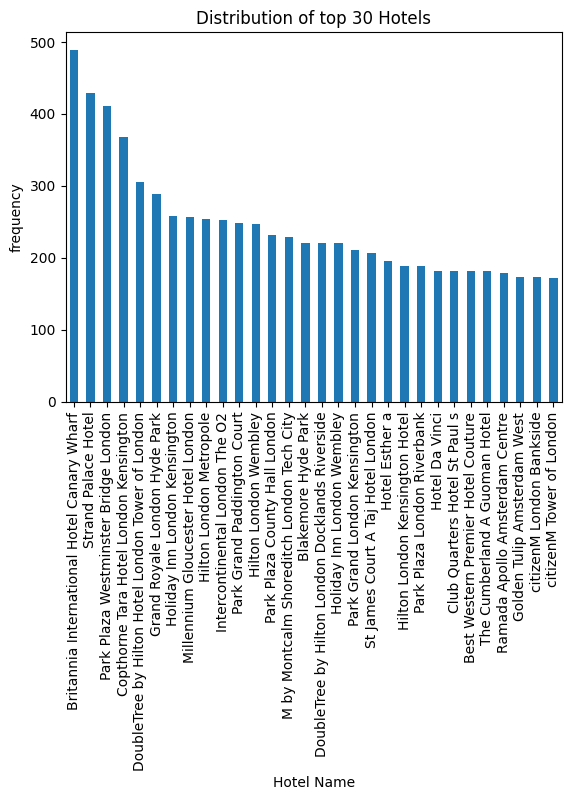

In [121]:
# bar garph for frequency of hotels
hotel2_df['Hotel_Name'].value_counts().sort_values(ascending=False)[:30].plot(kind='bar')
plt.xlabel('Hotel Name')
plt.ylabel('frequency')
plt.title('Distribution of top 30 Hotels')
plt.show()

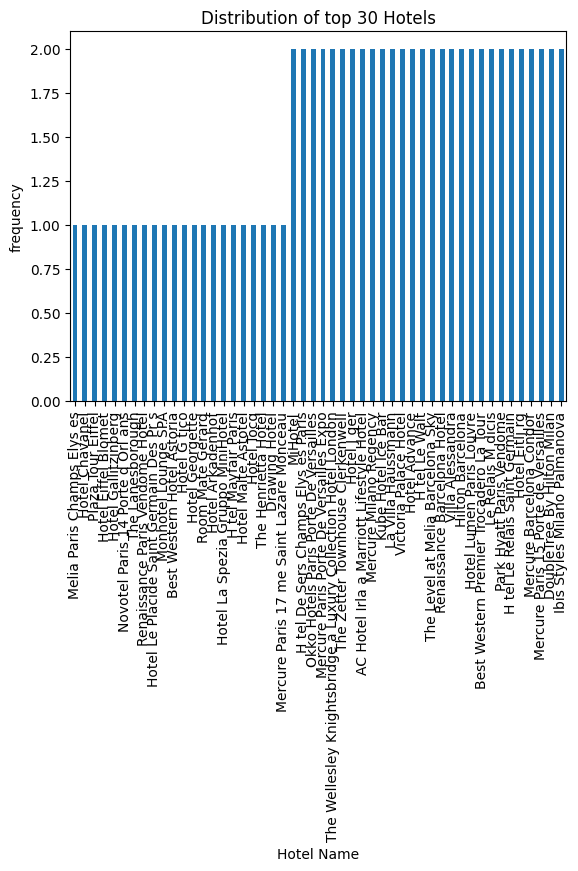

In [122]:
# bar graph for bottom 30 hotels
hotel2_df['Hotel_Name'].value_counts().sort_values(ascending=True)[:50].plot(kind='bar')
plt.xlabel('Hotel Name')
plt.ylabel('frequency')
plt.title('Distribution of top 30 Hotels')
plt.show()

From over 50,000 rows in our sample dataset, 1473 unique number of hotels present in the 6 cities. Since the distribution is that undistributed, it would be good to create this column into numerics usinf one hot encoding.

In [123]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
Hotel_Name = pd.DataFrame(hotel2_df['Hotel_Name'])
encoded = ohe.fit_transform(Hotel_Name)
encoded

<51469x1473 sparse matrix of type '<class 'numpy.float64'>'
	with 51469 stored elements in Compressed Sparse Row format>

In [124]:
# Convert from sparse matrix to dense
dense_array = encoded.toarray()
dense_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
ohe.categories_

[array(['11 Cadogan Gardens', '1K Hotel',
        '25hours Hotel beim MuseumsQuartier', ...,
        'citizenM Tower of London', 'every hotel Piccadilly',
        'pentahotel Vienna'], dtype=object)]

In [126]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

# Add original back in (just to check)
# encoded_df['Hotel_Name'] = hotel2_df['Hotel_Name']

# Show
encoded_df.head()

,11 Cadogan Gardens,1K Hotel,25hours Hotel beim MuseumsQuartier,41,88 Studios,9Hotel Republique,A La Villa Madame,ABaC Restaurant Hotel Barcelona GL Monumento,AC Hotel Barcelona Forum a Marriott Lifestyle Hotel,AC Hotel Diagonal L Illa a Marriott Lifestyle Hotel,...,Worldhotel Cristoforo Colombo,Zenit Barcelona,Zenit Borrell,art otel Amsterdam,citizenM Amsterdam,citizenM London Bankside,citizenM London Shoreditch,citizenM Tower of London,every hotel Piccadilly,pentahotel Vienna
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# reseting index for both the df before merging
encoded_df.reset_index(drop=True, inplace=True)

In [128]:
hotel2_df.reset_index(drop=True, inplace=True)

In [129]:
# concatenation
hotel2_df = pd.concat([hotel2_df, encoded_df], axis=1)

In [130]:
# sanity check
hotel2_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,"(Worldhotel Cristoforo Colombo,)","(Zenit Barcelona,)","(Zenit Borrell,)","(art otel Amsterdam,)","(citizenM Amsterdam,)","(citizenM London Bankside,)","(citizenM London Shoreditch,)","(citizenM Tower of London,)","(every hotel Piccadilly,)","(pentahotel Vienna,)"
0,Bryanston Street Marble Arch Westminster Borough London W1H 7EH United Kingdom,908,8.5,Amba Hotel Marble Arch,United Kingdom,Nothing it was great,5,3980,The room was fantastic could not have asked for more Bed was so comfy Breakfast was amazing the hotel smelt lovely staff very friendly Excellent location Loved it would definitely recommend,33,...,0,0,0,0,0,0,0,0,0,0
1,Donau City Stra e 7 22 Donaustadt 1220 Vienna Austria,321,8.6,Melia Vienna,Austria,The surrounding,3,3557,A very modern hotel clean and comfortable rooms excellent restaurant on top of the hotel very friendly staff,19,...,0,0,0,0,0,0,0,0,0,0
2,Prinsengracht 587 Amsterdam City Center 1067 HT Amsterdam Netherlands,145,9.3,Andaz Amsterdam Prinsengracht A Hyatt Hotel,Qatar,Maybe the sink but I get use to it,11,851,Everything s was perfect,5,...,0,0,0,0,0,0,0,0,0,0
3,1 Waterview Drive Greenwich London SE10 0TW United Kingdom,1258,9.4,Intercontinental London The O2,France,The breakfast not included in the price,9,4204,The view from the bedroom the restaurant was fantastic,11,...,0,0,0,0,0,0,0,0,0,0
4,Capellans 4 Ciutat Vella 08002 Barcelona Spain,387,8.9,Hotel Barcelona Catedral,United Kingdom,could of done with a bit more storage as drawers,11,2695,the bed was great as with the rest of the room,12,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# let's drop the Hotel_Name column now
hotel2_df.drop(columns=['Hotel_Name'], inplace = True)

In [132]:
# checking which are left
list(hotel2_df.select_dtypes(['object']).columns)

['Hotel_Address', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review']

---

#### 3.b.5 'Hotel_Address'
<a class ='anchor' id = 'Que3.b.5' ></a>

In [133]:
# peeking into the column
hotel2_df[['Hotel_Address']].sample(50)

,Hotel_Address
14705,230 A Mile End Road Tower Hamlets London E1 4LJ United Kingdom
12071,Empire Way Wembley Brent London HA9 8DS United Kingdom
21955,372 Strand Westminster Borough London WC2R 0JJ United Kingdom
26949,26 33 Queens Gardens Westminster Borough London W2 3BE United Kingdom
11016,Bail n 4 6 Eixample 08010 Barcelona Spain
19432,Chelsea Harbour Hammersmith and Fulham London SW10 0XG United Kingdom
41814,Robert Stolz Platz 1 01 Innere Stadt 1010 Vienna Austria
3484,52 Chiswell Street City of London London EC1Y 4SD United Kingdom
24684,Oosterdoksstraat 4 Amsterdam City Center 1011 DK Amsterdam Netherlands
9924,17 18 Upper Woburn Place Camden London WC1H 0HT United Kingdom


From above it seems that last two words in the Hotel address column have city and country in it. And one more thing can be observed is that UK has London in the above sample. It has to be checked that last 2 words are always city and country and is hotel present only in London in UK.

In [134]:
# splitting second last words from the column
hotel2_df["Hotel_City"] = hotel2_df["Hotel_Address"].map(lambda x: "".join(x.split()[-2]))

In [135]:
# checking frequency for country
hotel2_df['Hotel_City'].value_counts()

United       26348
Barcelona    5982 
Paris        5938 
Amsterdam    5724 
Vienna       3822 
Milan        3655 
Name: Hotel_City, dtype: int64

In [136]:
# splitting last word
hotel2_df["Hotel_Country"] = hotel2_df["Hotel_Address"].map(lambda x: "".join(x.split()[-1]))

In [137]:
# checking frequency
hotel2_df['Hotel_Country'].value_counts()

Kingdom        26348
Spain          5982 
France         5938 
Netherlands    5724 
Austria        3822 
Italy          3655 
Name: Hotel_Country, dtype: int64

In [138]:
hotel2_df.sample(1)

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,...,"(Zenit Borrell,)","(art otel Amsterdam,)","(citizenM Amsterdam,)","(citizenM London Bankside,)","(citizenM London Shoreditch,)","(citizenM Tower of London,)","(every hotel Piccadilly,)","(pentahotel Vienna,)",Hotel_City,Hotel_Country
15056,Gran Via 605 Eixample 08007 Barcelona Spain,343,8.4,United Kingdom,Bar was not open Sunday evening also a mini shop on the hotel premises would be useful for toiletries etc Also was not allowed to drink your own water at the rooftop pool but bar prices were very high up there,43,3222,Location rooftop pool had amazing views and plenty of places to sit nice bathroom spacious room Decoration of the hotel looked amazing very efficient cleaners changed towels every day good check in and out times helpful staff,38,5,...,0,0,0,0,0,0,0,0,Barcelona,Spain


#### Inferences from above-

1. Data is only from the 6 counties. 
2. And cities where hotels are located are their respective capitals.

Since there is only one single city in each country, so it won't make any sense to keep both the columns in the dataset, otherwise there is going to be high multicollinearity amongst the columns. Let's drop the `Hotel_City` column as `Hotel_Country` is more important to keep.


`Hotel_Country` can be used to analysed with the `Reviewer_Nationality`

In [139]:
# dropping the columns which are not required
hotel2_df.drop(columns=['Hotel_Address', 'Hotel_City'], inplace=True)

In [140]:
# sanity check
hotel2_df.sample(1)

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,"(Zenit Barcelona,)","(Zenit Borrell,)","(art otel Amsterdam,)","(citizenM Amsterdam,)","(citizenM London Bankside,)","(citizenM London Shoreditch,)","(citizenM Tower of London,)","(every hotel Piccadilly,)","(pentahotel Vienna,)",Hotel_Country
45614,197,9.4,United Kingdom,we liked everything,4,948,it is impossible not to like this unique boutique hotel trust me if you want a fabulous stay in Amsterdam go to the Toren,26,3,1,...,0,0,0,0,0,0,0,0,0,Netherlands


__Note:__ Entire UK contains England, Ireland, Wales and Scotland. But here only London, England is taken care of on the basis of dataset.

Now let's convert the this column to numeric.

In [141]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
Hotel_Name = pd.DataFrame(hotel2_df['Hotel_Country'])
encoded = ohe.fit_transform(Hotel_Name)
encoded

<51469x6 sparse matrix of type '<class 'numpy.float64'>'
	with 51469 stored elements in Compressed Sparse Row format>

In [142]:
# Convert from sparse matrix to dense
dense_array = encoded.toarray()
dense_array

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [143]:
ohe.categories_

[array(['Austria', 'France', 'Italy', 'Kingdom', 'Netherlands', 'Spain'],
       dtype=object)]

In [144]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

# Add original back in (just to check)
# encoded_df['Hotel_Name'] = hotel2_df['Hotel_Name']

# Show
encoded_df.head()

,Austria,France,Italy,Kingdom,Netherlands,Spain
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,0,0,1


In [145]:
# resetting the dataframes befor concatenating
encoded_df.reset_index(drop=True, inplace=True)

In [146]:
hotel2_df.reset_index(drop=True, inplace=True)

In [147]:
# concatenating
hotel2_df = pd.concat([hotel2_df, encoded_df], axis=1)

In [148]:
# sanity check
hotel2_df.head()

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,"(citizenM Tower of London,)","(every hotel Piccadilly,)","(pentahotel Vienna,)",Hotel_Country,"(Austria,)","(France,)","(Italy,)","(Kingdom,)","(Netherlands,)","(Spain,)"
0,908,8.5,United Kingdom,Nothing it was great,5,3980,The room was fantastic could not have asked for more Bed was so comfy Breakfast was amazing the hotel smelt lovely staff very friendly Excellent location Loved it would definitely recommend,33,2,1,...,0,0,0,Kingdom,0,0,0,1,0,0
1,321,8.6,Austria,The surrounding,3,3557,A very modern hotel clean and comfortable rooms excellent restaurant on top of the hotel very friendly staff,19,3,1,...,0,0,0,Austria,1,0,0,0,0,0
2,145,9.3,Qatar,Maybe the sink but I get use to it,11,851,Everything s was perfect,5,9,1,...,0,0,0,Netherlands,0,0,0,0,1,0
3,1258,9.4,France,The breakfast not included in the price,9,4204,The view from the bedroom the restaurant was fantastic,11,2,1,...,0,0,0,Kingdom,0,0,0,1,0,0
4,387,8.9,United Kingdom,could of done with a bit more storage as drawers,11,2695,the bed was great as with the rest of the room,12,11,0,...,0,0,0,Spain,0,0,0,0,0,1


In [149]:
# let's drop the column now
hotel2_df.drop(columns=['Hotel_Country'], inplace = True)

In [150]:
# checking which columns are left
list(hotel2_df.select_dtypes(['object']).columns)

['Reviewer_Nationality', 'Negative_Review', 'Positive_Review']

Just one `Reviewer_Nationality` is left.

---

#### 3.b.6 Reviewer_Nationality
<a class ='anchor' id = 'Que3.b.6' ></a>

In [151]:
# peeking into the `Reviewer_Nationality` column
hotel2_df[['Reviewer_Nationality']].sample(10)

,Reviewer_Nationality
27797,Kuwait
7908,Finland
24318,United Kingdom
19569,Kuwait
9653,United Kingdom
28129,Qatar
18012,Estonia
43639,Russia
25095,Ireland
50836,Lebanon


In [152]:
# checking frequency
hotel2_df['Reviewer_Nationality'].value_counts()

 United Kingdom               24601
 United States of America     3462 
 Australia                    2150 
 Ireland                      1511 
 United Arab Emirates         1026 
                              ...  
 Barbados                     1    
 Faroe Islands                1    
 Papua New Guinea             1    
 Anguilla                     1    
 Honduras                     1    
Name: Reviewer_Nationality, Length: 176, dtype: int64

In [153]:
hotel2_df[['Reviewer_Nationality']].tail(20)

,Reviewer_Nationality
51449,United Kingdom
51450,Australia
51451,Jersey
51452,United Kingdom
51453,Belgium
51454,United Kingdom
51455,United Arab Emirates
51456,Saudi Arabia
51457,Ireland
51458,United Kingdom


In [154]:
# unique number of nationalities
len(pd.unique(hotel2_df['Reviewer_Nationality']))

176

In [155]:
print(pd.unique(hotel2_df['Reviewer_Nationality']))

[' United Kingdom ' ' Austria ' ' Qatar ' ' France ' ' Switzerland '
 ' South Africa ' ' Ireland ' ' Brazil ' ' Turkey ' ' Australia '
 ' United States of America ' ' Luxembourg ' ' United Arab Emirates '
 ' Sweden ' ' Tunisia ' ' Oman ' ' India ' ' Ukraine ' ' Saudi Arabia '
 ' Chile ' ' Germany ' ' Norway ' ' China ' ' Jersey ' ' South Korea '
 ' Italy ' ' Kazakhstan ' ' Lithuania ' ' Netherlands ' ' Hungary '
 ' Japan ' ' Indonesia ' ' Israel ' ' Spain ' ' Egypt ' ' Argentina '
 ' Czech Republic ' ' Canada ' ' Belgium ' ' Croatia ' ' Taiwan ' ' '
 ' Russia ' ' Kuwait ' ' Serbia ' ' Singapore ' ' Malaysia ' ' Hong Kong '
 ' Thailand ' ' Lebanon ' ' Greece ' ' Portugal ' ' Slovenia '
 ' Philippines ' ' Bulgaria ' ' Denmark ' ' Finland ' ' Slovakia '
 ' Romania ' ' Iceland ' ' Poland ' ' Morocco ' ' Gibraltar '
 ' New Zealand ' ' Kenya ' ' Panama ' ' Isle of Man ' ' Malta ' ' Ghana '
 ' Bahrain ' ' Estonia ' ' Jordan ' ' Nigeria ' ' Albania ' ' Pakistan '
 ' Latvia ' ' Sri Lanka ' ' Ir

__Plan:__ Since the distribution is very skewed for this column and there are 176 unique number of categories in the dataset, to have a better EDA and modelling, it would be really good so that we make clusters on the basis of `lat` and `lon` and then do OHE on that number of unique nationalities.


__Reason:__ Already we are dealing with the text data and it would be create a lot of columns when pre-processing is done on those columns. So it's better to reduce columns as much as we can. __HS__

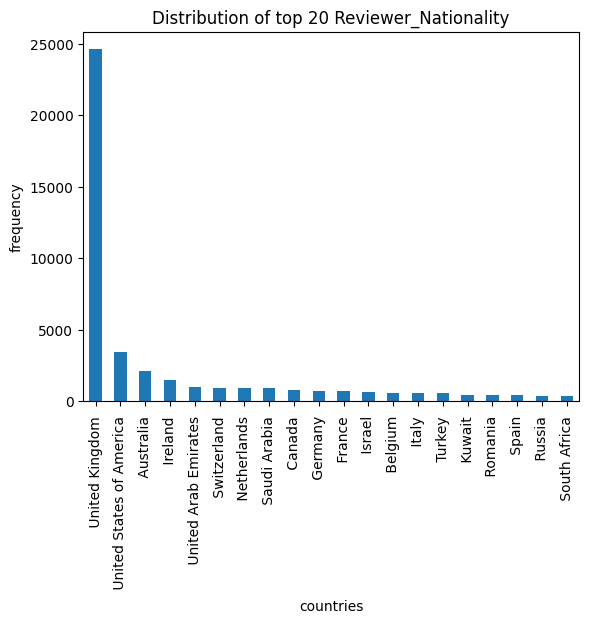

In [156]:
# distribution of reviewer_nationality column
hotel2_df['Reviewer_Nationality'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar')
plt.xlabel('countries')
plt.ylabel('frequency')
plt.title('Distribution of top 20 Reviewer_Nationality')
plt.show()

Clearly UK has most number of reviewers. Difference between first and second spot is huge!!

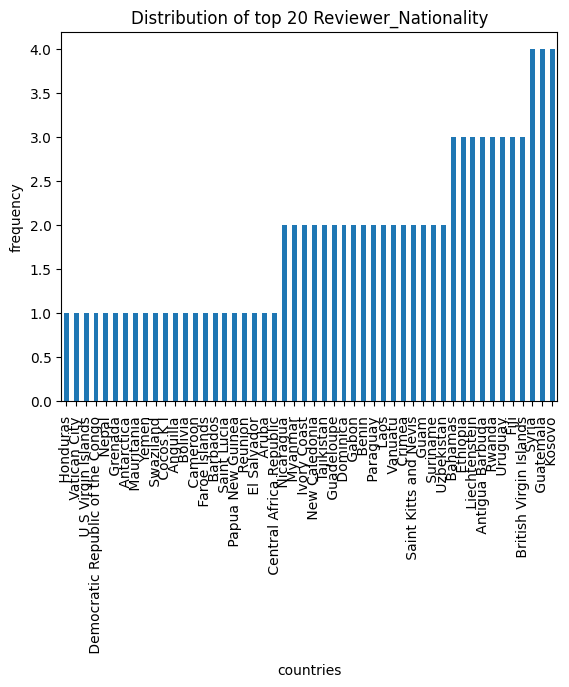

In [157]:
# distribution of reviewer_nationality column
hotel2_df['Reviewer_Nationality'].value_counts().sort_values(ascending=True)[:50].plot(kind='bar')
plt.xlabel('countries')
plt.ylabel('frequency')
plt.title('Distribution of top 20 Reviewer_Nationality')
plt.show()

---

---

### Additional part

__Another way at looking this column and problem:__

I tried assigning all the `Reviewer_Nationalities` into 7 continents, so that first of all we can have less columns in the dataset. My plan was to have latitudes and longitudes of all 227 nations using geopy package, which can be seen below. Then I would cluster these 227 nations into 7 continents using kmeans cluster, which needed latitudes and longtitudes of countries.
[geopy func](https://www.geeksforgeeks.org/how-to-find-longitude-and-latitude-for-a-list-of-regions-or-country-using-python/)

The only problem with the function I wrote below is that it takes a lot of time to run on rows even greater than 50. I tried on a sample of 51 rows and still it took ~10sec. I think for func, Google Colab or AWS could have been used.
 [how to cluster](https://blog.jcharistech.com/2020/07/20/clustering-countries-into-continents-using-unsupervised-machine-learning/)

In [158]:
# peeking into the `Reviewer_Nationality` column
hotel2_df[['Reviewer_Nationality']].sample(10)

,Reviewer_Nationality
12333,United Kingdom
21341,Italy
10020,United Kingdom
49211,Lithuania
6164,Poland
26047,Ireland
8697,United Kingdom
51235,United Kingdom
44882,United Kingdom
21908,United Kingdom


In [159]:
# installing geopy
pip install geopy

SyntaxError: invalid syntax (3032748816.py, line 2)

In [160]:
hotel2_df.shape

(51469, 3138)

The function was taking too much time to run, so I took very small fraction of the dataset, just to try.

In [968]:
# taking 1% out of hotel2_df
hotel3_df = hotel2_df.sample(frac=0.001, random_state=1)

In [969]:
# samity check
hotel3_df.shape

(51, 1496)

In [970]:
from geopy import geocoders  

In [971]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(city):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findGeocode(city)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (hotel3_df["Reviewer_Nationality"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [972]:
# now add this column to dataframe
hotel3_df["Longitude"] = longitude
hotel3_df["Latitude"] = latitude
  
hotel3_df.sample(1)

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,"(every hotel Piccadilly,)","(pentahotel Vienna,)","(Austria,)","(France,)","(Italy,)","(Kingdom,)","(Netherlands,)","(Spain,)",Longitude,Latitude
40778,333,8.3,United Kingdom,glass shower cabin in the middle of the room will not be to everyone s liking,18,3672,location is very good just outside city centre but within walking distance of everything public transport also very accessible good breakfast,23,16,1,...,0,0,1,0,0,0,0,0,-3.276575,54.702354


In [973]:
hotel3_df[['Reviewer_Nationality', 'Longitude', 'Latitude', 'lat', 'lng']].sample(15)

,Reviewer_Nationality,Longitude,Latitude,lat,lng
32729,Ireland,-7.979460,52.865196,51.501400,-0.116009
7275,Austria,14.124560,47.593970,51.519032,-0.182594
20309,Switzerland,8.231974,46.798562,48.878943,2.344862
43871,Ireland,-7.979460,52.865196,41.372784,2.172113
121,United Kingdom,-3.276575,54.702354,51.505151,-0.100472
41247,United Kingdom,-3.276575,54.702354,41.390721,2.166073
36219,United Kingdom,-3.276575,54.702354,52.362566,4.877923
38266,United Kingdom,-3.276575,54.702354,41.390782,2.171743
2735,United Kingdom,-3.276575,54.702354,41.402362,2.211905
2058,United Kingdom,-3.276575,54.702354,51.501910,-0.023221


In [974]:
hotel3_df = hotel3_df.dropna()

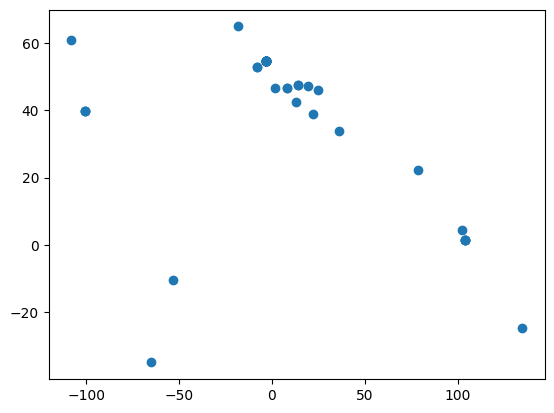

In [975]:
plt.scatter(hotel3_df['Longitude'],hotel3_df['Latitude'])

In [976]:
from sklearn.cluster import KMeans

In [977]:
# By Assumation we have 7 continents
# k = 7
km = KMeans(n_clusters=7)

In [978]:
# Prep
xfeatures = hotel3_df[['Longitude','Latitude']]

In [979]:
# Fit n Predict
clusters = km.fit_predict(xfeatures)

In [980]:
clusters

array([2, 2, 2, 2, 2, 2, 1, 3, 0, 3, 0, 2, 2, 0, 3, 2, 3, 2, 2, 2, 0, 0,
       2, 1, 2, 2, 2, 2, 0, 2, 5, 1, 0, 2, 2, 0, 3, 2, 2, 2, 2, 2, 6, 2,
       4, 2, 2, 0, 1, 4])

In [981]:
# Store and Map
hotel3_df['cluster_continents'] = clusters

In [982]:
# sanity check
hotel3_df[['Reviewer_Nationality', 'Latitude', 'Longitude', 'cluster_continents']].sample(10)

,Reviewer_Nationality,Latitude,Longitude,cluster_continents
32729,Ireland,52.865196,-7.979460,2
34504,Singapore,1.357107,103.819499,3
20736,United Kingdom,54.702354,-3.276575,2
36219,United Kingdom,54.702354,-3.276575,2
931,United Kingdom,54.702354,-3.276575,2
25991,Hungary,47.181759,19.506094,0
20309,Switzerland,46.798562,8.231974,0
11086,France,46.603354,1.888334,2
37884,Switzerland,46.798562,8.231974,0
32184,Singapore,1.357107,103.819499,3


And eventually if we would have run the above steps on our hotel2_df, `Reviewer_Nationality` could have been dropped. 


This would have saved a lot of columns for us. Though information of all the countries would not be available but continental information would have been enough.


Anyways let's do OHE on hotel2_df.

---

##### OHE on hotel2_df['Reviewer_Nationality']

In [158]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
subcategory = pd.DataFrame(hotel2_df['Reviewer_Nationality'])
encoded = ohe.fit_transform(subcategory)
encoded

<51469x176 sparse matrix of type '<class 'numpy.float64'>'
	with 51469 stored elements in Compressed Sparse Row format>

In [159]:
# Convert from sparse matrix to dense
dense_array = encoded.toarray()
dense_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [160]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)


# Show
encoded_df.head()

,,Abkhazia Georgia,Albania,Algeria,Andorra,Angola,Anguilla,Antarctica,Antigua Barbuda,Argentina,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
# resetting index before merging
encoded_df.reset_index(drop=True, inplace=True)

In [162]:
hotel2_df.reset_index(drop=True, inplace=True)

In [163]:
# concatenating
hotel2_df = pd.concat([hotel2_df, encoded_df], axis=1)

In [164]:
# let's drop the `Reviewer_Nationality` column
hotel2_df.drop(columns=['Reviewer_Nationality'], inplace=True)

In [165]:
# checking if any left
list(hotel2_df.select_dtypes(['object']).columns)

['Negative_Review', 'Positive_Review']

This is what we wanted, conversion of all object type columns to numeric except `Negative_Review` and `Positive_Review`.

In [166]:
hotel2_df.shape

(51469, 3313)

---

## 3.c split the data into train-test splits
<a class ='anchor' id = 'Que3.c' ></a>

In [167]:
# instantiating our independent and dependent variables 
X = hotel2_df.drop(columns="Reviewer_Score")
y = hotel2_df["Reviewer_Score"]

In [168]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [169]:
# size of training data
X_train.shape

(34484, 3312)

In [170]:
# size of training data
y_train.shape

(34484,)

In [171]:
# size of training data
X_test.shape

(16985, 3312)

In [172]:
X.sample(1)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng,...,"( United States of America ,)","( Uruguay ,)","( Uzbekistan ,)","( Vanuatu ,)","( Vatican City ,)","( Venezuela ,)","( Vietnam ,)","( Yemen ,)","( Zambia ,)","( Zimbabwe ,)"
9359,438,7.4,Vastly over priced wifi cost extra which is a rip off shower head fell off and TV signal was patchy,21,1786,No Positive,0,14,51.49674,-0.206472,...,0,0,0,0,0,0,0,0,0,0


In [173]:
y

0        1
1        1
2        1
3        1
4        0
        ..
51464    0
51465    1
51466    1
51467    1
51468    0
Name: Reviewer_Score, Length: 51469, dtype: int32

---

### 3.d Use a count vectorizer to combine `Positive_Review` and `Negative_Review` with the numeric data (notice that this is done AFTER the train/test split). You should vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the min_df parameter.
<a class ='anchor' id = 'Que3.d' ></a>

In [175]:
# peeking into our 2 text columns
hotel2_df[['Positive_Review', 'Negative_Review']]

,Positive_Review,Negative_Review
0,The room was fantastic could not have asked for more Bed was so comfy Breakfast was amazing the hotel smelt lovely staff very friendly Excellent location Loved it would definitely recommend,Nothing it was great
1,A very modern hotel clean and comfortable rooms excellent restaurant on top of the hotel very friendly staff,The surrounding
2,Everything s was perfect,Maybe the sink but I get use to it
3,The view from the bedroom the restaurant was fantastic,The breakfast not included in the price
4,the bed was great as with the rest of the room,could of done with a bit more storage as drawers
...,...,...
51464,Location was perfect,Night duty manager wasn t aware of check in check out time in the website We made the booking at 02 am to stay for a couple of hours and the duty manager wasn t able to locate the booking It may be good to have some better training as the check in advertise in the website shows you can do a reservation anytime after 15pm The person managing the place was discussing with me what I booked without checking the system properly We waisted 30 mins
51465,Great staff good location to get into Central London and out again,No Negative
51466,It seems they are also gayfriendlly,No Negative
51467,the room was very spacious bright and clean,someone turned our card for roomkeeping to do not disturb so we did not get roomkeeping for the second day of our stay


It has already been checked before that there are __no null values in the dataset and even there are no empty strings.__ It can be seen from above that there are rows where reviews are entered as "No Negative"..., which means either the reviewer left it blank or the data could been filtered before publishing.

Let's start with `Positive_Review` and convert it to numerics

### `Positive_Review`

In [176]:
# peeking into the column
hotel2_df['Positive_Review']

0         The room was fantastic could not have asked for more Bed was so comfy Breakfast was amazing the hotel smelt lovely staff very friendly Excellent location Loved it would definitely recommend 
1         A very modern hotel clean and comfortable rooms excellent restaurant on top of the hotel very friendly staff                                                                                  
2         Everything s was perfect                                                                                                                                                                      
3         The view from the bedroom the restaurant was fantastic                                                                                                                                        
4         the bed was great as with the rest of the room                                                                                                                                            

#### Steps of converting text data into numerics:

- **Tokenizing**: Something that might have come up in Exercise 1 is the issue of punctuation. Do we include that in the token or just remove it? This is a common issue in NLP, along with a few other problems when we talk about *tokenizing* text data. 


- **Stop word removal**: You might have also considered how to deal with common stop words (and, or, the, etc.). These words are very common in language and usually link parts of sentences rather than conveying particular meaning or information. 


- **Stemming and lemmatization**: Another example is actually modifying the unique words like shortening words from *working* to *work* to try and reduce the number of columns in the matrix and encode commonality between sentences like: 


We'll do the steps one by one for both the columns separately.

In [177]:
# CountVectorizer is one of the methods to do different operations on text
from sklearn.feature_extraction.text import CountVectorizer

In [178]:
# 1. Instantiate 
bagofwords = CountVectorizer(min_df=5) # min_df=5 excludes tokens which are less than 5 in any of the texts

# 2. Fit 
bagofwords.fit(X_train['Positive_Review'])

# 3. Transform
small_transformed = bagofwords.transform(X_train['Positive_Review'])
small_transformed

<34484x3506 sparse matrix of type '<class 'numpy.int64'>'
	with 456393 stored elements in Compressed Sparse Row format>

`min_df` makes the matrix much shorter, that's why it should be precisely in case of sensitive and sarcastic data.

In [179]:
# these are now the features, they are the individual tokens
bagofwords.get_feature_names()

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '02',
 '10',
 '100',
 '100m',
 '10am',
 '10min',
 '10mins',
 '10th',
 '11',
 '11am',
 '11pm',
 '11th',
 '12',
 '12pm',
 '12th',
 '13',
 '14',
 '14th',
 '15',
 '15min',
 '15mins',
 '15th',
 '16',
 '16th',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '197',
 '19th',
 '1min',
 '1st',
 '20',
 '200',
 '200m',
 '2016',
 '20mins',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '24h',
 '24hr',
 '24hrs',
 '25',
 '26',
 '2min',
 '2nd',
 '30',
 '300',
 '30am',
 '30min',
 '30pm',
 '30th',
 '35',
 '360',
 '3min',
 '3pm',
 '3rd',
 '40',
 '40th',
 '45',
 '4g',
 '4pm',
 '4th',
 '50',
 '500',
 '50th',
 '55',
 '5min',
 '5mins',
 '5th',
 '60',
 '60th',
 '6th',
 '7am',
 '7th',
 '80',
 '8th',
 '90',
 '9am',
 'abbey',
 'ability',
 'able',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutely',
 'abundant',
 'ac',
 'acceptable',
 'accepted',
 'acces',
 'access',
 'accessed',
 'accessibility',
 'accessible',
 'accessories',
 'accident',
 'accommodate',
 'accommodated',
 'accommodating',
 'accommodation',
 'accom

Above are all the tokens present in the `Positive_Review` column.

In [180]:
# converting the sparse matrix into a numpy array
small_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [181]:
# small_transformed = X_train_transformed
X_train_transformed = bagofwords.transform(X_train['Positive_Review'])
X_train_transformed

<34484x3506 sparse matrix of type '<class 'numpy.int64'>'
	with 456393 stored elements in Compressed Sparse Row format>

In [182]:
# doing same operation on text data too
X_test_transformed = bagofwords.transform(X_test['Positive_Review'])
X_test_transformed

<16985x3506 sparse matrix of type '<class 'numpy.int64'>'
	with 226762 stored elements in Compressed Sparse Row format>

__Note:__ __It is very necesary to do same operations for both train and test data. This is because whenever models are made with the train data, those models should be run with same format as of train set as on test set.__


__In the following operations also, test set is transformed along with the train data.__

In [183]:
# assigned indices
words = bagofwords.get_feature_names()
some_indices = range(1, 3506, round(3506/10)) # just pick some indices
samples = [words[i] for i in some_indices]
print(samples)

['02', 'beans', 'college', 'eat', 'getaway', 'knightsbridge', 'none', 'quality', 'slept', 'took']


In [184]:
# display counts in a dataset
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,02,beans,college,eat,getaway,knightsbridge,none,quality,slept,took
total_corpus_count,26,5,9,168,9,13,26,464,116,119


Cool, we can see that summing up a column of our `X_train` document-term matrix gives how many times a token appeared in our overall corpus. 

Let's find the most frequently occurring words next.

In [185]:
# totel tokens in Positive_Review column
len(bagofwords.get_feature_names())

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3506

In [186]:
# convert to array
X_train_transformed.toarray().sum(axis=0)

array([ 39,  26, 437, ...,  12,   5,   5], dtype=int64)

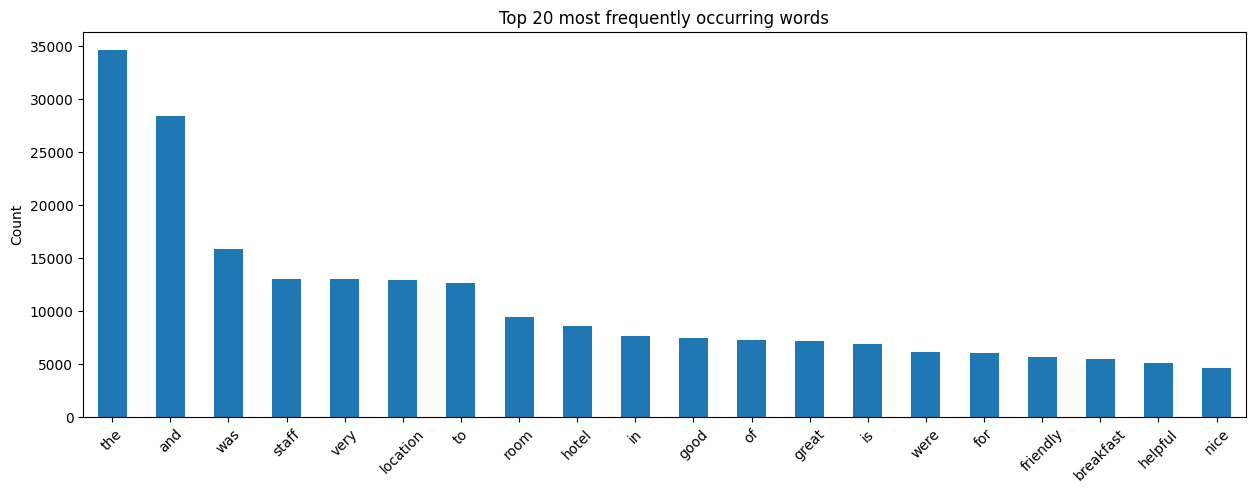

In [187]:
# bar graph showing most number of word appearences in the column
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

From above it can be seen that the words which occur most are the words which are quite common and don't really give a meaning to the text. Basically these are just the connecting words. Let's remove them.

In [188]:
# removing stop words
bagofwords = CountVectorizer(stop_words="english", min_df=5)
bagofwords.fit(X_train['Positive_Review'])

X_train_transformed = bagofwords.transform(X_train['Positive_Review']) 
X_test_transformed = bagofwords.transform(X_test['Positive_Review']) 

X_train_transformed.shape

(34484, 3249)

In [189]:
print(f'There are {X_train_transformed.shape[0]} rows and {X_train_transformed.shape[1]} columns in the dataset.')

There are 34484 rows and 3249 columns in the dataset.


In [190]:
3506-3249

257

257 columns or tokens or stopwords are removed from the column.

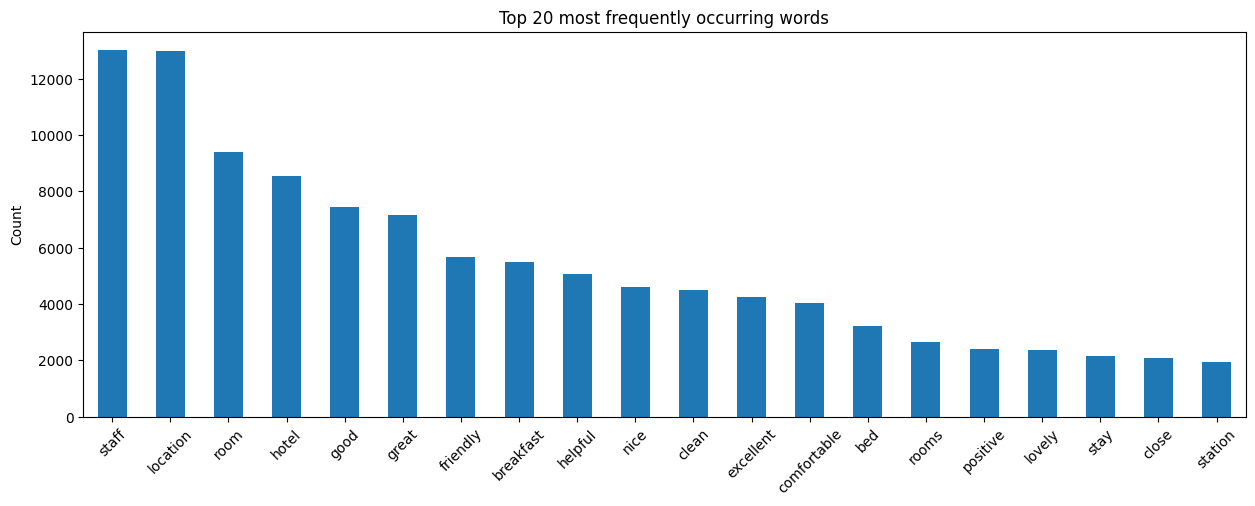

In [191]:
# let's plot the bar graph again to see most occured words
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

LogisticRegression(C=0.1)

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


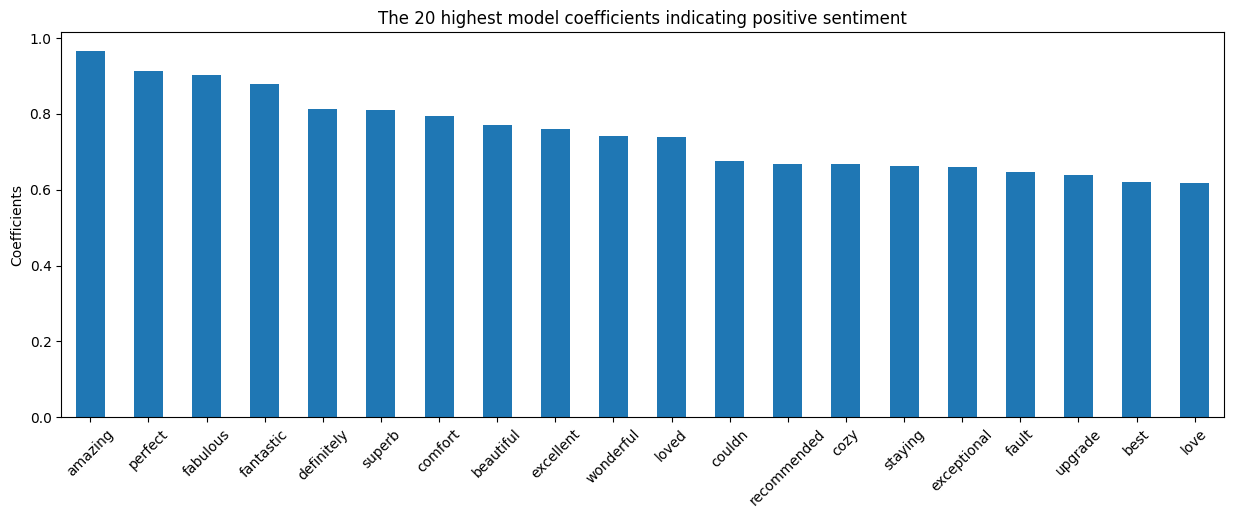

In [194]:
# bar graph showing influence metric for TOP 20 words in the column
word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=bagofwords.get_feature_names()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

From above, basically the words like 'amazing', 'perfect', 'famulous' and so on would definitely result in the fact that the review given by the customer is positive.

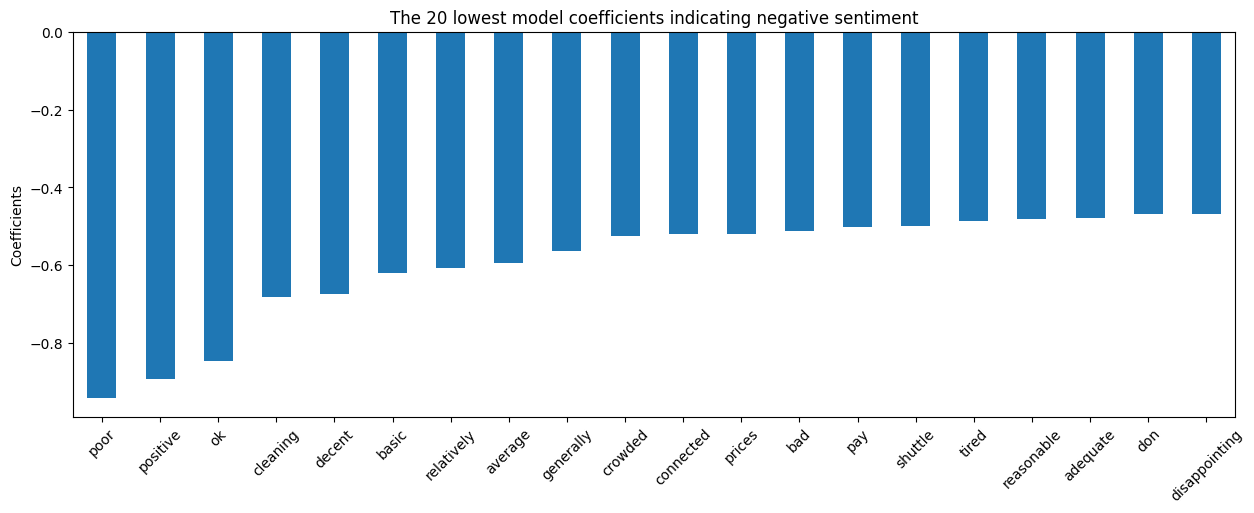

In [195]:
# bar graph showing influence metric for BOTTOM 20 words in the column
word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

Similar analogy can be applied here too that 'poor', 'positive', 'ok' and so on lead to the indication that the review is negative.

#### Stemming on `Positive_Review` column

Stemming basically removes the plurality of the words and thus considering different text words as one.

In [196]:
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

[stemmer.stem(i) for i in ['run', 'runs', 'running', 'ran', 'jogged', 'jogging', 'jogs']]

['run', 'run', 'run', 'ran', 'jog', 'jog', 'jog']

In [197]:
# putting stemming into our bagofwords function
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')
bagofwords.fit(X_train['Positive_Review'])

X_train_transformed = bagofwords.transform(X_train['Positive_Review'])
X_test_transformed = bagofwords.transform(X_test['Positive_Review'])

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim

Let's do the plotting again and see the changes.

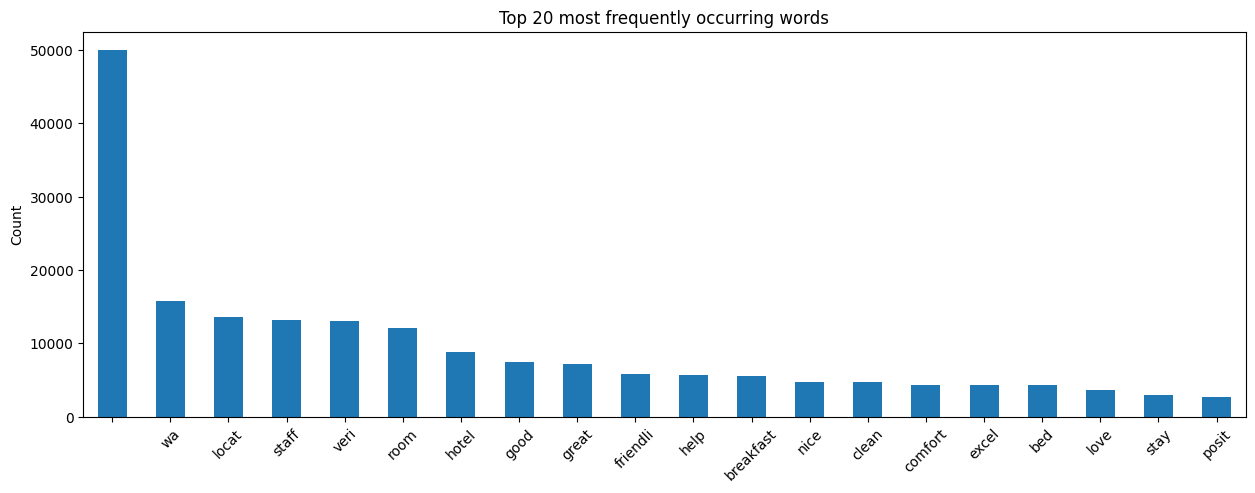

In [198]:
# bar graph for most frequent words
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [199]:
# the python string package has a helpful punctuation list
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [200]:
# a dummy sentence used for checking our process
sentence = "The quick brown fox, jumped over the lazy dog!!"

# after splitting the text based on spaces
split_sentence = sentence.split(' ')

# we stem and remove punctuation
tokenized_sentence = []
for word in split_sentence:
    for punctuation_mark in string.punctuation:
        word = word.replace(punctuation_mark, '')
    stemmed_word = stemmer.stem(word)
    tokenized_sentence.append(stemmed_word)
    
print(tokenized_sentence)

['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']


All the steps can be performed in a single function which can be customized as per the user needs.

Below is that function:


In [201]:
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [202]:
# checking tokenizer on simple sentence from above
my_tokenizer(sentence)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

In [203]:
# let's do it for our `Positive_Review` column
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer=my_tokenizer)
bagofwords.fit(X_train['Positive_Review'])

X_train_transformed = bagofwords.transform(X_train['Positive_Review'])
X_test_transformed = bagofwords.transform(X_test['Positive_Review'])

X_train_transformed.shape

(34484, 2695)

In [204]:
# Look at the shape of the dataframe
print(f'There are {X_train_transformed.shape[0]} rows and {X_train_transformed.shape[1]} columns in the dataset.')

There are 34484 rows and 2695 columns in the dataset.


Columns have dropped to huge extent!!!

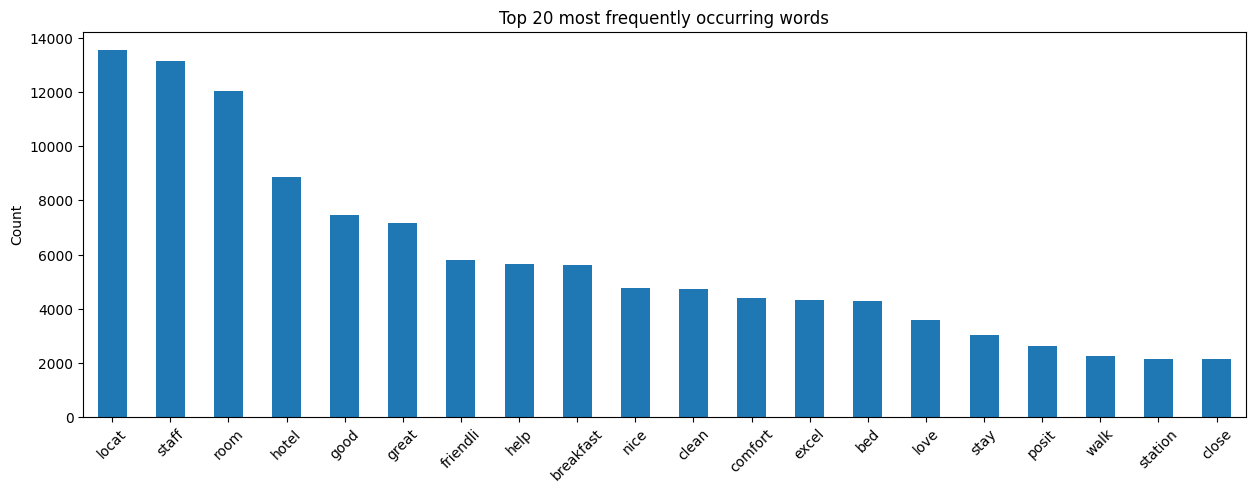

In [205]:
# let's make the bar graph again
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

From above it can be finally said that the top 20 most occuring words which really matter for positive review sentiment are "locat", "staff", "room", "hotel", "good" and so on.

Checking if columns are same in train and test set.


In [206]:
X_train_transformed

<34484x2695 sparse matrix of type '<class 'numpy.int64'>'
	with 308193 stored elements in Compressed Sparse Row format>

In [207]:
X_test_transformed

<16985x2695 sparse matrix of type '<class 'numpy.int64'>'
	with 152872 stored elements in Compressed Sparse Row format>

Let's convert both of these saparse matrices to pandas dataframe.

In [208]:
# making a df for train
X_train_transformed_df = pd.DataFrame(X_train_transformed.toarray(), columns=bagofwords.get_feature_names()).add_prefix('Counts_')

In [209]:
X_train_transformed_df.shape

(34484, 2695)

In [210]:
# making a df for test
X_test_transformed_df = pd.DataFrame(X_test_transformed.toarray(), columns=bagofwords.get_feature_names()).add_prefix('Counts_')

In [211]:
X_test_transformed_df.shape

(16985, 2695)

Both sparse matrices have 2695 columns which is necessary was expected.

Now we have follow the same steps for `Negative_Review` as we did for `Positive_Review`

### Countvectorizer for `Negative_Review`

In [212]:
# let's peek into our column
hotel2_df['Negative_Review']

0         Nothing it was great                                                                                                                                                                                                                                                                                                                                                                                                                                          
1         The surrounding                                                                                                                                                                                                                                                                                                                                                                                                                                               
2         Maybe the sink but I get use to it                                          

Basically let's follow the same steps.

In [213]:
from sklearn.feature_extraction.text import CountVectorizer

In [214]:
# 1. Instantiate 
bagofwords2 = CountVectorizer(min_df=5) #without min_df column size would have been huge

# 2. Fit 
bagofwords2.fit(X_train['Negative_Review'])

# 3. Transform
small_transformed = bagofwords2.transform(X_train['Negative_Review'])
small_transformed

<34484x4393 sparse matrix of type '<class 'numpy.int64'>'
	with 460666 stored elements in Compressed Sparse Row format>

In [215]:
# these are now the features, they are the individual tokens
bagofwords2.get_feature_names()

['00',
 '00am',
 '00pm',
 '02',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '10am',
 '10mins',
 '10pm',
 '10th',
 '11',
 '110',
 '11am',
 '11pm',
 '11th',
 '12',
 '120',
 '125',
 '12pm',
 '13',
 '135',
 '14',
 '140',
 '15',
 '150',
 '15min',
 '15mins',
 '15pm',
 '16',
 '17',
 '170',
 '18',
 '180',
 '19',
 '190',
 '1am',
 '1pm',
 '1st',
 '20',
 '200',
 '2015',
 '2016',
 '2017',
 '20mins',
 '21',
 '210',
 '21st',
 '22',
 '23',
 '24',
 '240',
 '24hr',
 '24hrs',
 '25',
 '250',
 '26',
 '260',
 '27',
 '28',
 '280',
 '2am',
 '2nd',
 '2pm',
 '30',
 '300',
 '30am',
 '30mins',
 '30pm',
 '30th',
 '31',
 '32',
 '33',
 '34',
 '35',
 '350',
 '3am',
 '3pm',
 '3rd',
 '40',
 '400',
 '42',
 '45',
 '48',
 '4am',
 '4pm',
 '4star',
 '4th',
 '50',
 '500',
 '54',
 '55',
 '5am',
 '5pm',
 '5th',
 '60',
 '600',
 '6am',
 '6ft',
 '6pm',
 '6th',
 '70',
 '75',
 '7am',
 '7pm',
 '7th',
 '80',
 '800',
 '8am',
 '8pm',
 '8th',
 '90',
 '90s',
 '95',
 '99',
 '9am',
 '9pm',
 '9th',
 'abandoned',
 'ability',
 'abit

Above array shows the features we have for the negative review column.

In [216]:
# converting the sparse matrix into a numpy array
small_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [217]:
# X_train_transformed2 is new name for this column
X_train_transformed2 = bagofwords2.transform(X_train['Negative_Review'])
X_train_transformed2

<34484x4393 sparse matrix of type '<class 'numpy.int64'>'
	with 460666 stored elements in Compressed Sparse Row format>

In [218]:
X_test_transformed2 = bagofwords2.transform(X_test['Negative_Review'])
X_test_transformed2

<16985x4393 sparse matrix of type '<class 'numpy.int64'>'
	with 226514 stored elements in Compressed Sparse Row format>

In [219]:
# Look at the shape of the dataframe
print(f'There are {X_test_transformed2.shape[0]} rows and {X_test_transformed2.shape[1]} columns in the dataset.')

There are 16985 rows and 4393 columns in the dataset.


Notice that X_test is transformed next to next with the X_train

In [220]:
words = bagofwords2.get_feature_names()
some_indices = range(1, 4393, round(4393/10)) # just pick some indices
samples = [words[i] for i in some_indices]
print(samples)

['00am', 'basket', 'complementary', 'eg', 'grubby', 'level', 'ordering', 'reflect', 'smiling', 'total', 'zero']


In [221]:
counts = np.array(X_train_transformed2[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,00am,basket,complementary,eg,grubby,level,ordering,reflect,smiling,total,zero
total_corpus_count,13,8,34,22,26,143,20,13,11,46,27


In [222]:
# cal total unique words in the column
len(bagofwords2.get_feature_names())

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4393

In [223]:
# converting sparse matix to array
X_train_transformed2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

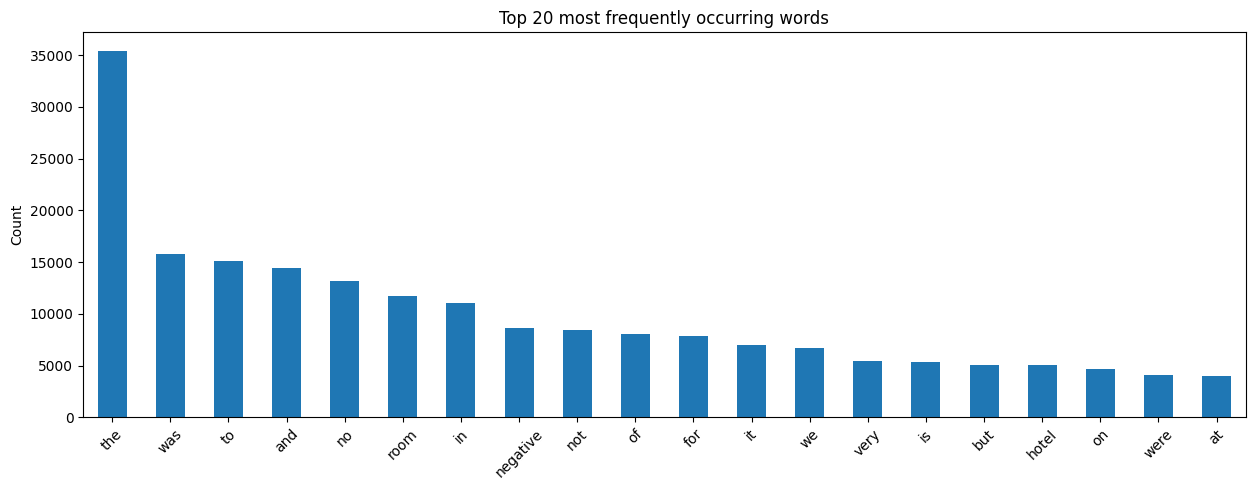

In [224]:
# bar graph showing most frequent words in negative review column
word_counts = pd.DataFrame(
    {"counts": X_train_transformed2.toarray().sum(axis=0)},
    index=bagofwords2.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Let's remove the stop words from the X_train_transformed2 and X_test_transformed2

In [225]:
# removing the stop words 
bagofwords2 = CountVectorizer(stop_words="english", min_df=5)
bagofwords2.fit(X_train['Negative_Review'])

X_train_transformed2 = bagofwords2.transform(X_train['Negative_Review']) 
X_test_transformed2 = bagofwords2.transform(X_test['Negative_Review']) 

X_train_transformed2.shape

(34484, 4123)

In [226]:
# Look at the shape of the dataframe
print(f'There are {X_train_transformed2.shape[0]} rows and {X_train_transformed2.shape[1]} columns in the dataset.')

There are 34484 rows and 4123 columns in the dataset.


Notice that our number of columns have decreased.

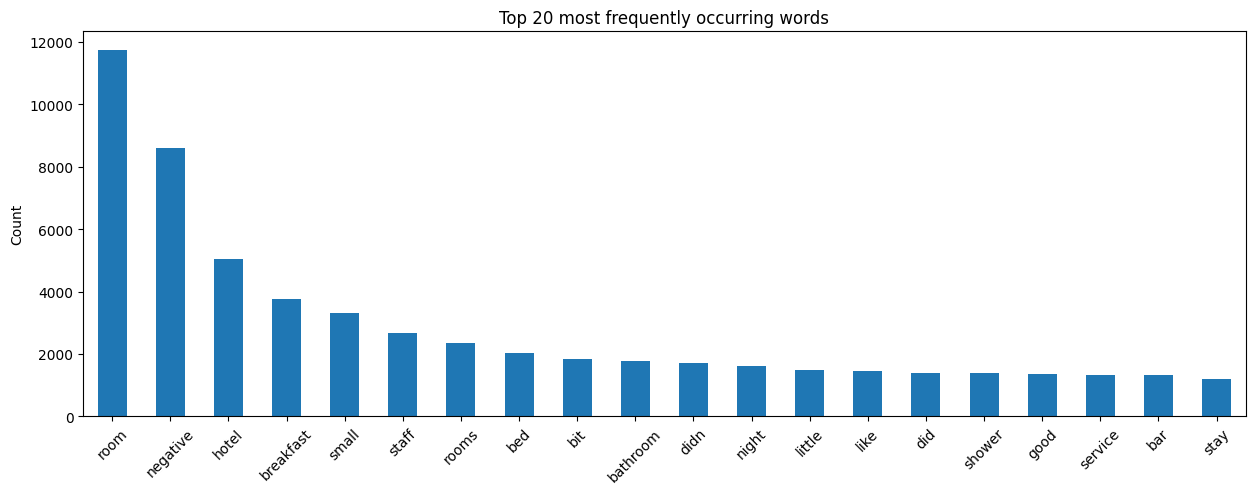

In [227]:
# plotting the bar graph again
word_counts = pd.DataFrame(
    {"counts": X_train_transformed2.toarray().sum(axis=0)},
    index=bagofwords2.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [228]:
from sklearn.linear_model import LogisticRegression

In [229]:
y_train.shape

(34484,)

#### Stemming

In [230]:
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

[stemmer.stem(i) for i in ['run', 'runs', 'running', 'ran', 'jogged', 'jogging', 'jogs']]

['run', 'run', 'run', 'ran', 'jog', 'jog', 'jog']

In [231]:
# including stemming function in Countvectorizer
bagofwords2 = CountVectorizer(min_df=5, 
                             tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')
bagofwords2.fit(X_train['Negative_Review'])

X_train_transformed2 = bagofwords2.transform(X_train['Negative_Review'])
X_test_transformed2 = bagofwords2.transform(X_test['Negative_Review'])

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim

In [232]:
X_train_transformed2.toarray()

array([[2, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

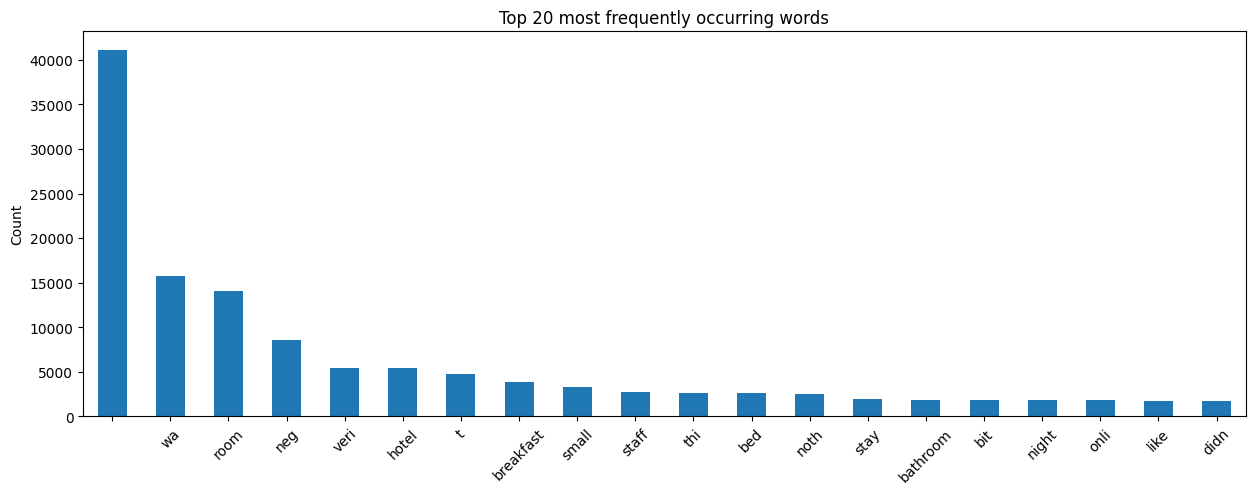

In [233]:
# let's plot the bar again
word_counts = pd.DataFrame(
    {"counts": X_train_transformed2.toarray().sum(axis=0)},
    index=bagofwords2.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [234]:
# the python string package has a helpful punctuation list
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [235]:
# a dummy sentence used for checking our process
sentence = "The quick brown fox, jumped over the lazy dog!!"

# after splitting the text based on spaces
split_sentence = sentence.split(' ')

# we stem and remove punctuation
tokenized_sentence = []
for word in split_sentence:
    for punctuation_mark in string.punctuation:
        word = word.replace(punctuation_mark, '')
    stemmed_word = stemmer.stem(word)
    tokenized_sentence.append(stemmed_word)
    
print(tokenized_sentence)

['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']


All the steps before this can be done in a customized function as shown below.

In [236]:
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [237]:
# checking tokenizer on simple sentence from above
my_tokenizer(sentence)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

In [238]:
# putting the function in the bagofwords
bagofwords2 = CountVectorizer(min_df=5, 
                             tokenizer=my_tokenizer)
bagofwords2.fit(X_train['Negative_Review'])

X_train_transformed2 = bagofwords2.transform(X_train['Negative_Review'])
X_test_transformed2 = bagofwords2.transform(X_test['Negative_Review'])

X_train_transformed2.shape

(34484, 3253)

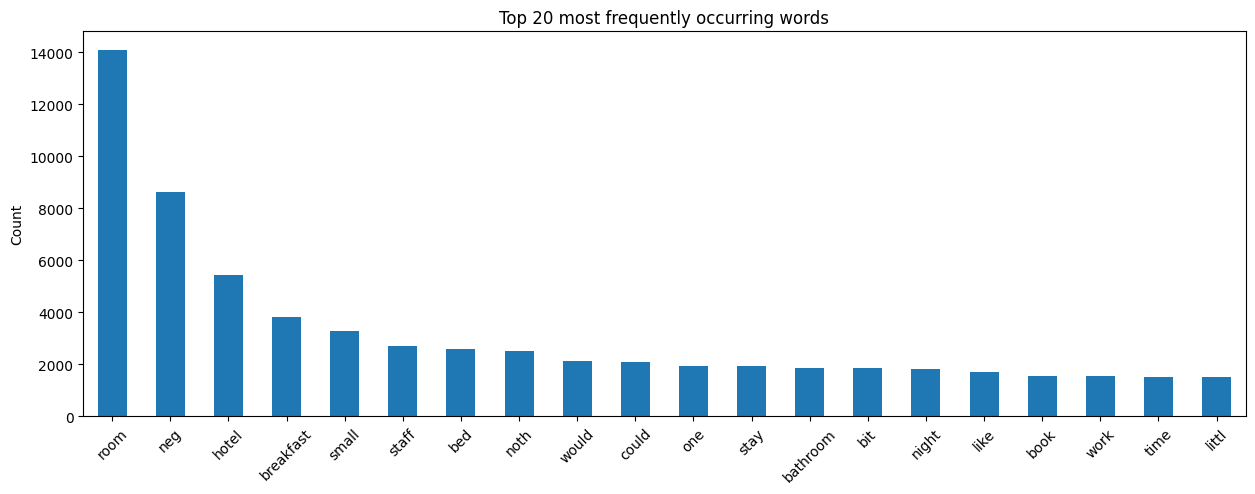

In [239]:
# making bar graph for top 20 most frequently occuring words
word_counts = pd.DataFrame(
    {"counts": X_train_transformed2.toarray().sum(axis=0)},
    index=bagofwords2.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [240]:
# making dataframe of train
X_train_transformed2_df = pd.DataFrame(X_train_transformed2.toarray(), columns=bagofwords2.get_feature_names()).add_prefix('Counts_')

In [241]:
X_train_transformed2_df.shape

(34484, 3253)

In [242]:
# making dataframe of test
X_test_transformed2_df = pd.DataFrame(X_test_transformed2.toarray(), columns=bagofwords2.get_feature_names()).add_prefix('Counts_')

In [243]:
X_test_transformed2_df.shape

(16985, 3253)

---

In [245]:
print(X_train_transformed2_df.shape)
print(X_train_transformed_df.shape)
print(X_train.shape)

(34484, 3253)
(34484, 2695)
(34484, 3312)


In [251]:
final_df = pd.concat([X_train_transformed2_df, X_train_transformed_df, X_train], axis=1)

In [252]:
final_df.shape

(45868, 9260)

Our dataset is ready and it has 45868 rows and 9260 columns or features. We can do modelling on it now.

In [253]:
print(X_test_transformed2_df.shape)
print(X_test_transformed_df.shape)
print(X_test.shape)

(16985, 3253)
(16985, 2695)
(16985, 3312)


In [256]:
test_df = pd.concat([X_test_transformed2_df, X_test_transformed_df, X_test], axis=1)

MemoryError: Unable to allocate 702. MiB for an array with shape (3253, 28305) and data type float64

In [255]:
test_df.shape

NameError: name 'test_df' is not defined

After modelling is done we can test the models and check the accuracy in test_df.

### 3.e What does the min_df parameter do?
<a class ='anchor' id = 'Que3.e' ></a>

min_df removes the words which appear less frequently in the rows. For example, if min_df is assigned to 5 in any kind of vectorizer function, it would remove the words which appear for less than 5. This is used because if the text data is huge and removing words which appear rarely, would barely affect our model and EDA. Also, we are getting benefit of reducing the number of columns by it.

---

---

## Summary

The train data is ready for modelling after being converted to numbers in all the columns. Also test data is also modified along with the train data.

So basically train the best accurate on the train set and check the accuracy for the test set.

## Thank You!